# TP 2

## Objectifs
1.  Tracer des graphiques en utilisant
    [matplotlib](https://matplotlib.org/api/pyplot_api.html)
2.  Lecture et tracé d'histogrammes d'images.
3.  Travailler avec les algorithmes de [regroupement](http://scikit-learn.org/stable/modules/clustering.html)
    et [classification](http://scikit-learn.org/stable/modules/svm.html)

## Exercise 1 \[★\]

[matplotlib](https://matplotlib.org/stable/api/pyplot_summary.html) peut être utilisé pour tracer des graphiques. Vous trouverez ci-dessous un code très simple avec seulement des valeurs x. Après avoir importé la bibliothèque *matplotlib*, nous initialisons les valeurs de x et nous traçons le graphique.



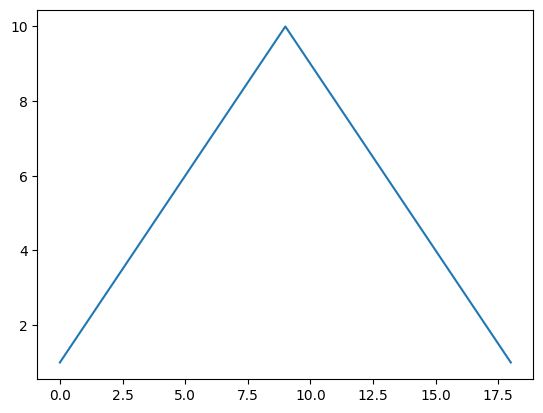

In [1]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
plot.plot(x)
plot.show()

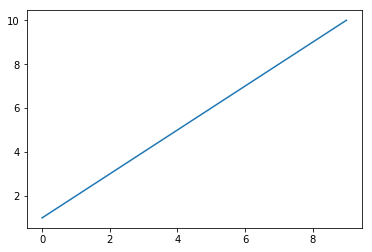



Modifions maintenant la couleur, le style et la largeur de la ligne.

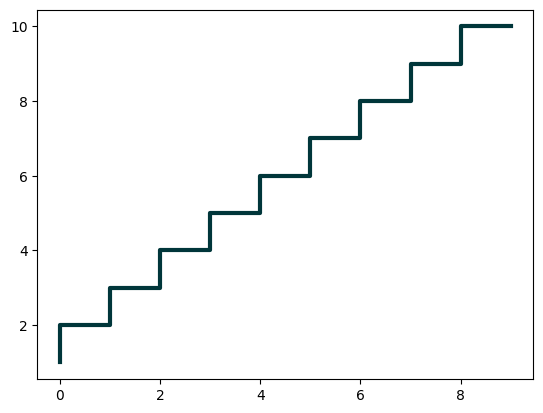

In [2]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

Nous allons maintenant initialiser les valeurs y et tracer le graphique.

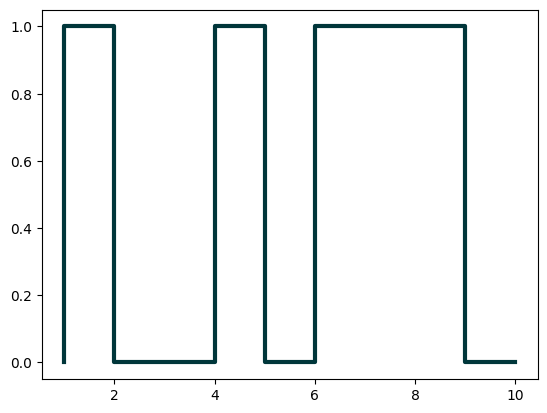

In [3]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
plot.plot(x, y, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

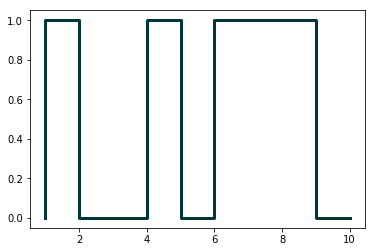



Lors de la [première séance pratique](../TP1/tp1.ipynb), nous avons vu comment analyser les fichiers JSON. En continuant avec le même fichier [JSON](../../data/pl.json), nous allons maintenant représenter graphiquement  les résultats
du nombre de langages de programmation publiés par an. Vérifiez le résultat.

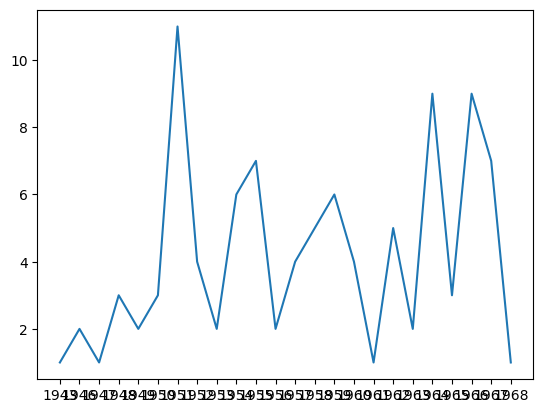

In [4]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
plot.plot(grouped)
plot.show()

Le programme suivant ajoutera le titre et les étiquettes à l'axe des x et à l'axe des y.

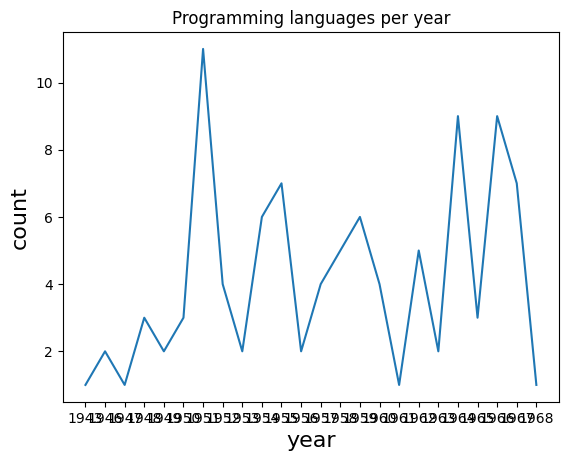

In [5]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
plot.plot(grouped)
plot.title("Programming languages per year")
plot.xlabel("year", fontsize=16)
plot.ylabel("count", fontsize=16)
plot.show()

Il existe encore une autre façon de tracer les 'dataframes', en utilisant
[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html).



<Axes: title={'center': 'Programming languages per year'}, xlabel='year'>

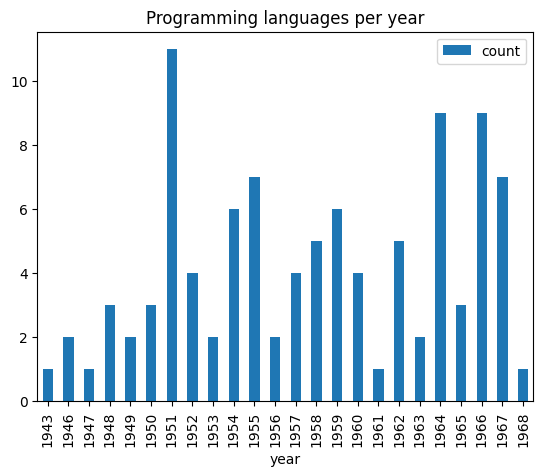

In [6]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
grouped = grouped.rename(columns={"languageLabel": "count"}).reset_index()
grouped.plot(x=0, kind="bar", title="Programming languages per year")

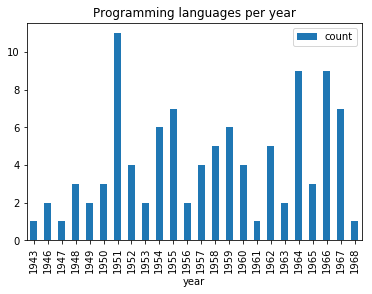

Maintenant, nous voulons créer plusieurs sous-images. Une méthode simple est donnée ci-dessous.
Rappelons que lors de la [première séance pratique](../TP1/tp1.ipynb), nous avons regroupé par
sur plusieurs colonnes. Des sous-parcelles peuvent être utilisées pour visualiser ces données.



In [7]:
!pip install pandas --upgrade

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9156\2512958025.py:23: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g = grouped.get_group(group).reset_index()
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9156\2512958025.py:23: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g = grouped.get_group(group).reset_index()
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9156\2512958025.py:23: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g = grouped.get_group(group).reset_index()
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9156\

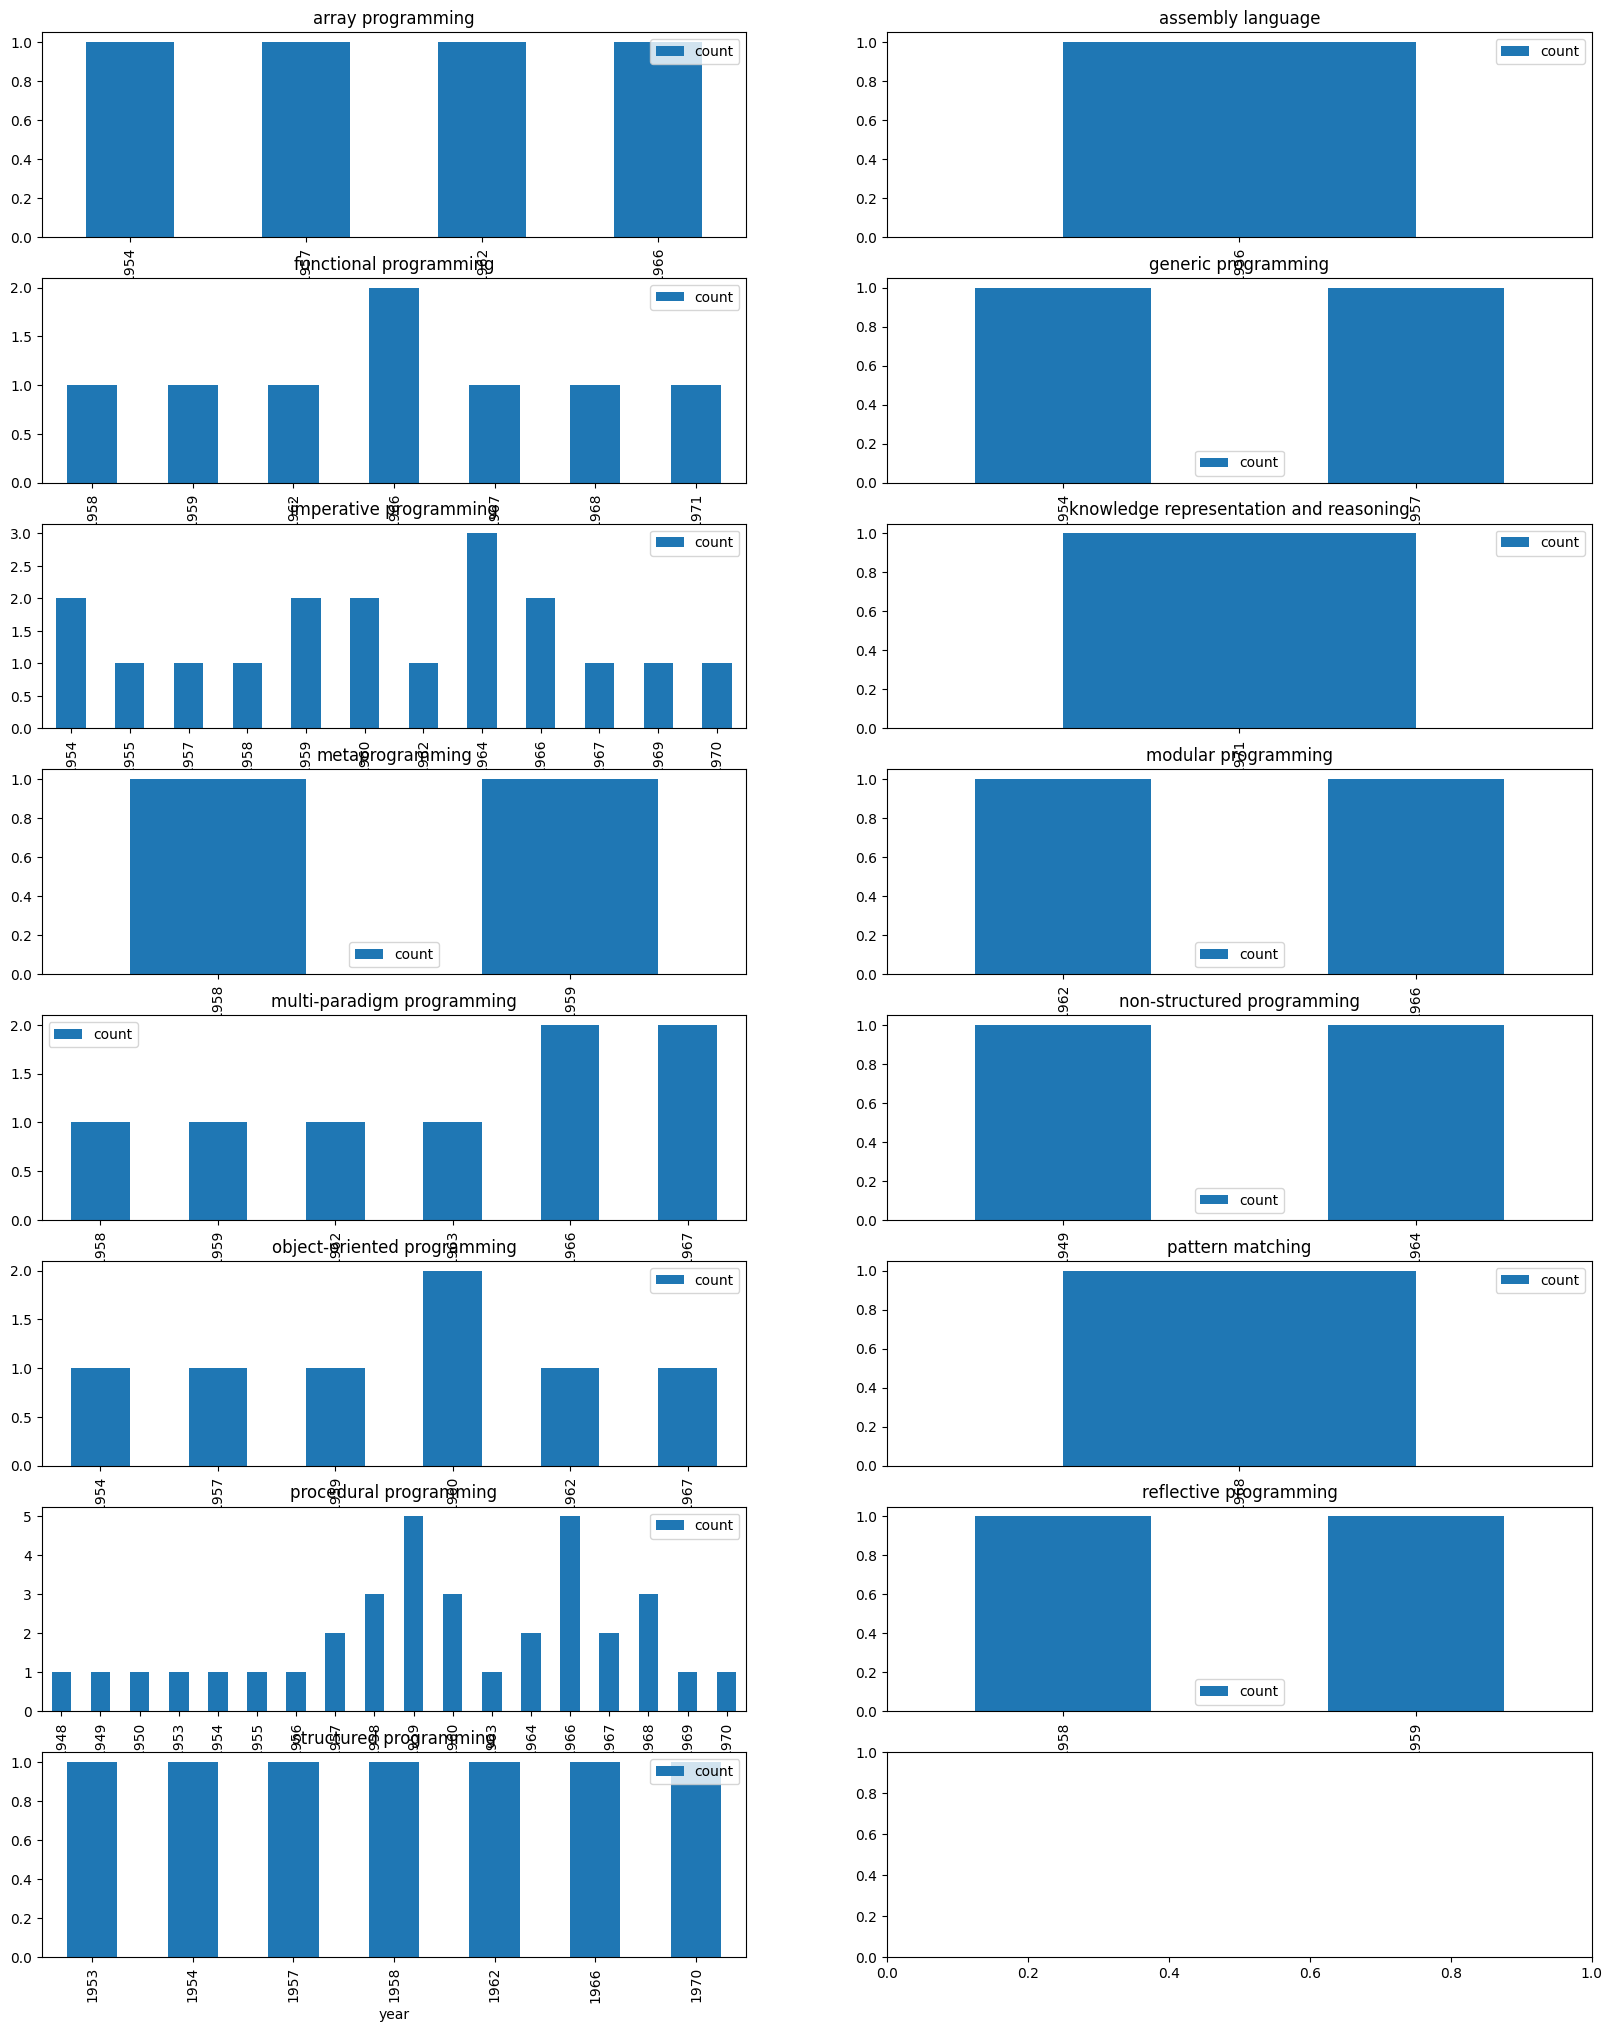

In [8]:
from pandas import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

jsondata = json.load(open("../../data/plparadigm.json"))
array = []
for data in jsondata:
    array.append([data["year"], data["languageLabel"], data["paradigmLabel"]])
dataframe = pd.DataFrame(array, columns=["year", "languageLabel", "paradigmLabel"])
dataframe = dataframe.astype(
    dtype={"year": "int64", "languageLabel": "<U200", "paradigmLabel": "<U200"}
)
grouped = dataframe.groupby(["paradigmLabel", "year"]).count()
grouped = grouped.rename(columns={"languageLabel": "count"})
grouped = grouped.groupby(["paradigmLabel"])
# Initialization of subplots
nr = math.ceil(grouped.ngroups / 2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20, 25))
# Creation of subplots
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    g.plot(
        x="year", y="count", kind="bar", title=group, ax=axes[math.floor(i / 2), i % 2]
    )
plot.show()

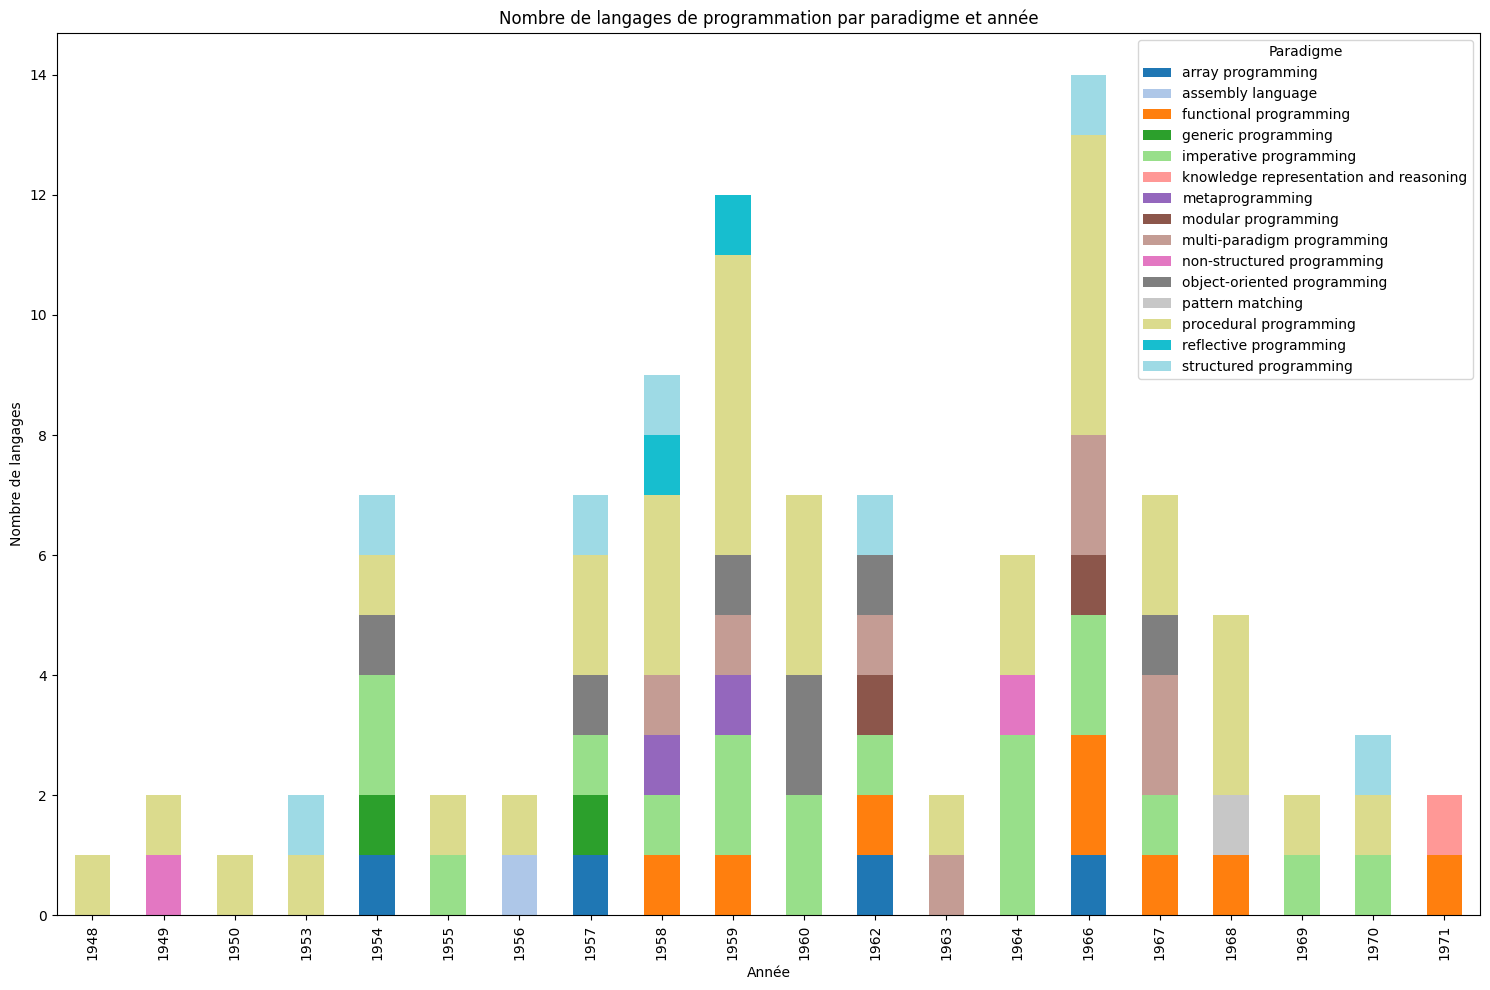

In [9]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Charger les données JSON
jsondata = json.load(open("../../data/plparadigm.json"))

# Créer une liste à partir des données JSON
array = []
for data in jsondata:
    array.append([data["year"], data["languageLabel"], data["paradigmLabel"]])

# Créer un DataFrame
dataframe = pd.DataFrame(array, columns=["year", "languageLabel", "paradigmLabel"])
dataframe = dataframe.astype(
    dtype={"year": "int64", "languageLabel": "<U200", "paradigmLabel": "<U200"}
)

# Grouper par année et paradigme, puis compter le nombre de langages
grouped = dataframe.groupby(["year", "paradigmLabel"]).size().reset_index(name='count')

# Initialisation des sous-graphiques
fig, ax = plt.subplots(figsize=(15, 10))

# Tracer un graphique à barres empilées
grouped.pivot(index="year", columns="paradigmLabel", values="count").plot(kind="bar", stacked=True, ax=ax, colormap='tab20')

# Configurer le graphique
ax.set_title("Nombre de langages de programmation par paradigme et année")
ax.set_xlabel("Année")
ax.set_ylabel("Nombre de langages")
ax.legend(title="Paradigme")

# Afficher le graphique
plt.tight_layout()
plt.show()


Modifiez le code ci-dessus, afin que nous puissions obtenir des informations visuelles sur le nombre de langages de différents paradigmes de programmation publiés au cours de chaque année disponible, c'est-à-dire que pour chaque année, nous voulons voir le nombre de langages de programmation appartenant à chaque paradigme de langage de programmation.



## Exercice 2 \[★\]

Dans cet exercice, nous allons travailler sur les images. Téléchargez une image (par ex,
[image.bmp](../../images/picture.bmp) et [flower.jpg](../../images/flower.jpg)) dans votre dossier et ouvrez-la de la manière suivante. Nous allons d'abord essayer d'obtenir quelques métadonnées de l'image.

In [10]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/picture.bmp")
print(imgfile.size, imgfile.format)

(640, 480) BMP


Nous utilisons le module 'Image' de Python PIL
([Documentation](http://www.effbot.org/imagingbook/image.htm)). Nous allons essayez maintenant d'obtenir des données de 100 pixels à partir d'une image.

In [11]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/flower.jpg")
data = imgfile.getdata()
for i in range(10):
    for j in range(10):
        print(i, j, data.getpixel((i, j)))

0 0 (102, 94, 105)
0 1 (77, 69, 82)
0 2 (77, 70, 86)
0 3 (75, 71, 86)
0 4 (75, 71, 86)
0 5 (77, 71, 85)
0 6 (78, 70, 83)
0 7 (80, 70, 81)
0 8 (78, 70, 83)
0 9 (80, 69, 83)
1 0 (78, 70, 83)
1 1 (53, 45, 58)
1 2 (53, 46, 62)
1 3 (50, 46, 61)
1 4 (53, 46, 62)
1 5 (52, 46, 60)
1 6 (53, 45, 58)
1 7 (55, 45, 56)
1 8 (55, 44, 58)
1 9 (54, 43, 57)
2 0 (76, 70, 82)
2 1 (53, 45, 60)
2 2 (53, 45, 60)
2 3 (52, 46, 60)
2 4 (53, 47, 61)
2 5 (54, 46, 59)
2 6 (55, 44, 58)
2 7 (56, 44, 58)
2 8 (54, 44, 55)
2 9 (54, 42, 54)
3 0 (78, 72, 86)
3 1 (55, 47, 62)
3 2 (56, 48, 63)
3 3 (55, 47, 60)
3 4 (56, 48, 61)
3 5 (57, 46, 60)
3 6 (56, 45, 59)
3 7 (56, 44, 58)
3 8 (54, 42, 54)
3 9 (53, 41, 53)
4 0 (80, 74, 86)
4 1 (57, 49, 62)
4 2 (57, 49, 60)
4 3 (57, 49, 60)
4 4 (59, 49, 60)
4 5 (57, 47, 56)
4 6 (56, 44, 54)
4 7 (56, 43, 53)
4 8 (54, 41, 51)
4 9 (52, 39, 49)
5 0 (82, 76, 90)
5 1 (59, 51, 64)
5 2 (61, 50, 64)
5 3 (59, 49, 60)
5 4 (58, 48, 57)
5 5 (57, 45, 55)
5 6 (55, 43, 53)
5 7 (54, 41, 51)
5 8 (53, 40,

Vous pouvez remarquer la position et les valeurs des pixels (un tuple de 3 valeurs). Essayons d'obtenir des métadonnées supplémentaires sur les images, c'est-à-dire le mode de l'image (par exemple, RGB)), le nombre de bandes, le nombre de bits pour chaque bande, la largeur et la hauteur de l'image (en pixels).


In [12]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/flower.jpg")
print(imgfile.mode, imgfile.getbands(), imgfile.bits, imgfile.width, imgfile.height)

RGB ('R', 'G', 'B') 8 640 480


Nous pouvons également obtenir des informations supplémentaires sur les images, comme les informations EXIF (Exchangeable image file format). Dans certains cas, les informations EXIF des images sont supprimées (car elles peuvent contenir des informations privées).

In [13]:
import os, sys
from PIL import Image
from PIL.ExifTags import TAGS

imgfile = Image.open("../../images/flower.jpg")
exif_data = imgfile._getexif()

if exif_data:  # s'il existe des informations EXIF
    for tag, value in exif_data.items():
        if tag in TAGS:
            print(TAGS[tag], value)

ResolutionUnit 2
ExifOffset 204
Make Canon
Model Canon EOS 1100D
YResolution 72.0
Orientation 1
DateTime 2018:02:11 10:47:45
YCbCrPositioning 2
Copyright 
XResolution 72.0
Artist 
ExifVersion b'0230'
ComponentsConfiguration b'\x01\x02\x03\x00'
ShutterSpeedValue 6.375
DateTimeOriginal 2012:07:29 16:45:44
DateTimeDigitized 2012:07:29 16:45:44
ApertureValue 5.0
ExposureBiasValue 0.0
MeteringMode 5
UserComment b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

Obtenons maintenant un histogramme des couleurs. Lorsque vous exécutez le code suivant, vous obtenez un tableau unique de valeurs, la fréquence de chaque bande (R, G, B etc.) concaténée ensemble. Dans le code suivant, nous supposerons que nous travaillons avec une image de 3 bandes (mode RGB) et que chaque bande est représentée par 8 bits. Nous allons tracer le [histogramme](http://www.effbot.org/imagingbook/image.htm#tag-Image.Image.histogram) de différentes couleurs.



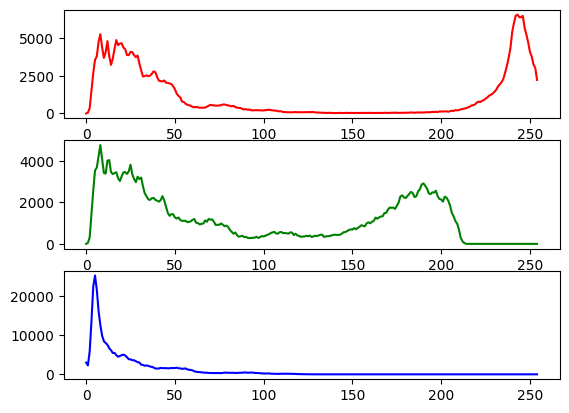

In [14]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
# we have three bands (for this image)
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
fig, (axis1, axis2, axis3) = plot.subplots(nrows=3, ncols=1)
axis1.plot(red, color="red")
axis2.plot(green, color="green")
axis3.plot(blue, color="blue")
plot.show()

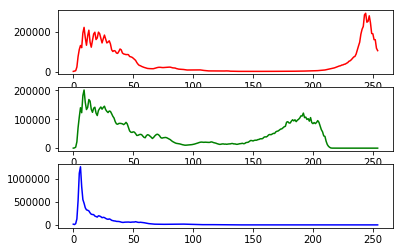

Mais si vous souhaitez les voir tous dans une seule image.



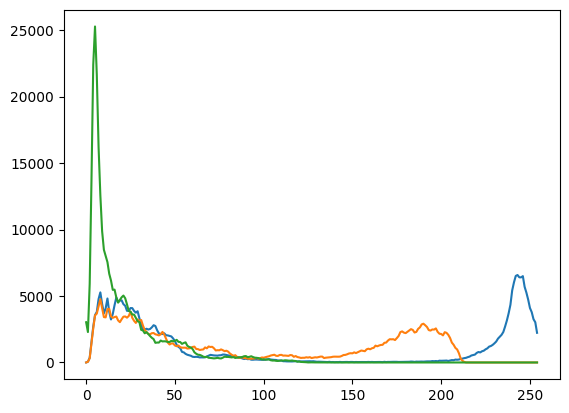

In [15]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
x = range(255)
y = []
for i in x:
    y.append((red[i], green[i], blue[i]))
plot.plot(x, y)
plot.show()

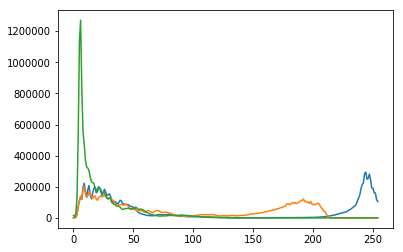

Mais nous ne voulons pas perdre les couleurs de la bande.



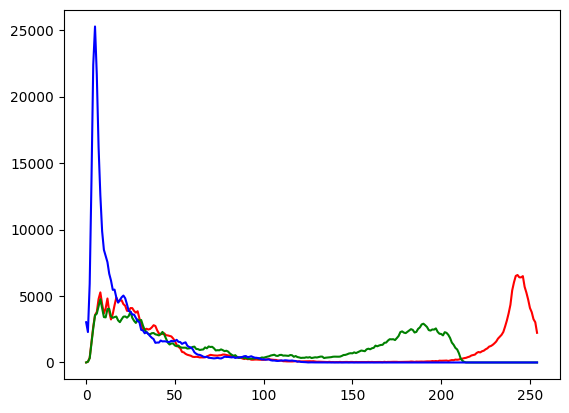

In [16]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
x = range(255)
y = []
for i in x:
    y.append((red[i], green[i], blue[i]))
figure, axes = plot.subplots()
axes.set_prop_cycle("color", ["red", "green", "blue"])
plot.plot(x, y)
plot.show()

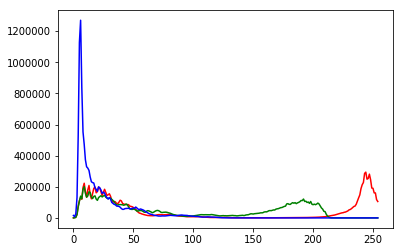

Votre prochaine question consiste à obtenir les 20 premières intensités dans chaque bande et à créer un seul tracé de ces premières intensités. Écrivez un programme python qui peut réaliser cela.

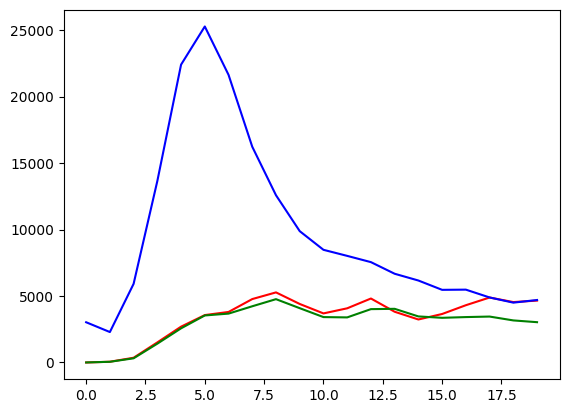

In [17]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
x = range(255)
y = []
for i in x:
    y.append((red[i], green[i], blue[i]))
figure, axes = plot.subplots()
axes.set_prop_cycle("color", ["red", "green", "blue"])
y = y[:20]
x = x[:20]
plot.plot(x, y)
plot.show()

## Exercice 3 \[★★\]

Dans cet exercice, nous examinerons  [Algorithme de regroupement KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
En continuant avec les images, nous allons maintenant trouver 4 couleurs prédominantes dans une image.


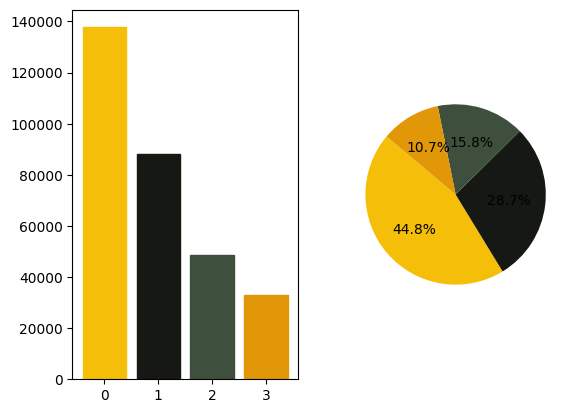

In [52]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

n_clusters = int(input("Donnez le nombre de clusters souhaité : "))

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
clusters = KMeans(n_clusters=n_clusters, n_init=2)
clusters.fit(numarray)
npbins = numpy.arange(0, n_clusters+1)
histo = numpy.histogram(clusters.labels_, bins=npbins)
histogram = (numpy.sort(histo[0])[::-1], histo[1])
labels = numpy.unique(clusters.labels_)

plot.subplot(121)
barlist = plot.bar(labels, histogram[0])
for i in range(n_clusters):
    barlist[i].set_color(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )

plot.subplot(122)
cirlist = plot.pie(
    histogram[0],
    colors=[
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
            for i in range(n_clusters)
        ],
        autopct='%1.1f%%',
        startangle=140)

plot.show()

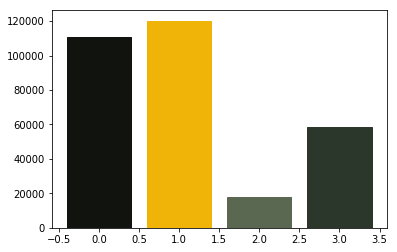

Pour votre prochaine question, votre objectif est de comprendre le code ci-dessus et
réaliser ce qui suit :
1.  Supposer que le nombre de grappes est donné par l'utilisateur, généraliser
    le code ci-dessus.
2.  En cas de diagramme à barres, assurez-vous que les barres sont disposées dans le
    ordre décroissant de la fréquence des couleurs.
3.  Ajoutez également le support pour le graphique circulaire en plus du graphique en barres. Assurez-vous que
    que nous utilisons les couleurs de l'image comme les couleurs de la tranche. 
4.  Avez-vous des observations intéressantes ?

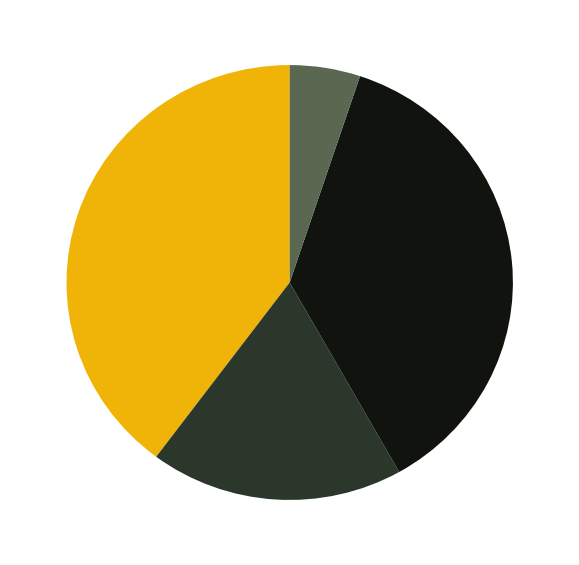



## Exercise 4 \[★★\]

Nous allons essayer d'obtenir plus de clusters et de vérifier le temps pris par chacun de ces algorithmes.
Commençons par quelques exercices très simples pour expérimenter l'algorithme KMeans. Considérez les données suivantes et visualisez-les sur un nuage de points à l'aide d'un diagramme de dispersion.

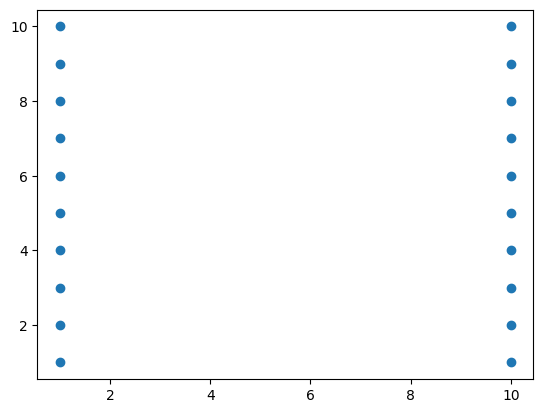

In [53]:
import numpy as np
import matplotlib.pyplot as plot

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

plot.scatter(numarray[:, 0], numarray[:, 1])
plot.show()

Visuellement, il est assez évident qu'il y a deux groupes. Mais utilisons l'algorithme KMeans pour obtenir les 2 clusters. Nous allons d'abord voir les étiquettes de nos données regroupées.

In [54]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=2, n_init=2)
clusters.fit(numarray)
print(clusters.labels_)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


Maintenant, nous allons visualiser les groupes à l'aide d'un nuage de points. Nous utiliserons
deux couleurs pour les distinguer visuellement.

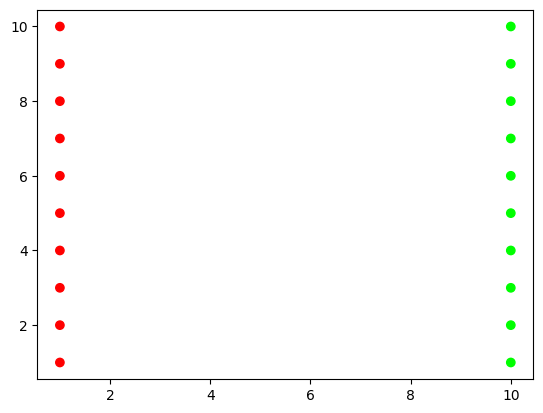

In [55]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=2, n_init=2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

Et si nous essayions d'obtenir 4 clusters ? Essayez d'exécuter le code suivant, plusieurs fois. Des observations ? Essayez de changer la valeur de *n_init* avec des valeurs plus élevées.

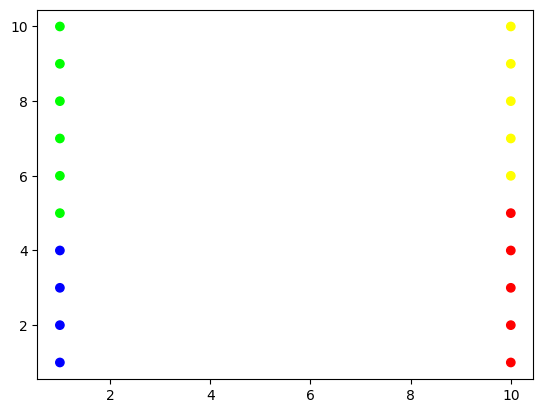

In [62]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=4, n_init=5)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

Nous allons maintenant essayer d'obtenir des clusters avec des données réelles (référence : [citypopulation.json](../../data/citypopulation.json), Source : Wikidata). Il contient des informations concernant différentes villes du monde : nom de la ville, année de sa fondation et sa population en l'année 2010. Dans le code suivant, nous voulons regrouper les données sur la population et d'observer s'il y a une corrélation entre l'âge et la les statistiques de la population (2010). Dans le code suivant, il y a un ligne commentée. Vous pouvez le décommenter pour essayer avec une population différente les chiffres. Des observations ? Pourquoi avons-nous utilisé LabelEncoder ? Quelle est sa but ?

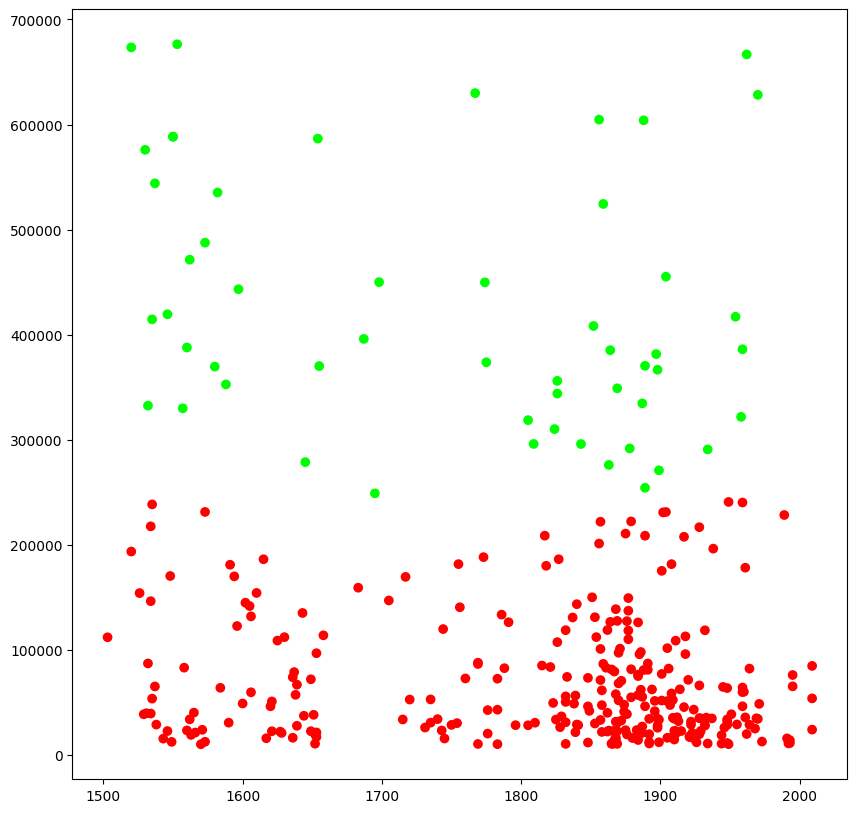

In [70]:
from pandas import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import json

with open("../../data/citypopulation.json", "r", encoding="utf-8") as f:
    data = json.load(f)
    
dataframe = json_normalize(data)
le = LabelEncoder()
dataframe["cityLabel"] = le.fit_transform(dataframe["cityLabel"])
dataframe = dataframe.astype(
    dtype={"year": "<i4", "cityLabel": "<U200", "population": "i"}
)
dataframe = dataframe.loc[dataframe["year"] > 1500]
dataframe = dataframe.loc[dataframe['population'] < 700000]
yearPopulation = dataframe[["year", "population"]]
clusters = KMeans(n_clusters=2, n_init=1000)
clusters.fit(yearPopulation.values)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.rcParams["figure.figsize"] = [10, 10]
plot.scatter(
    yearPopulation["year"], yearPopulation["population"], c=colors[clusters.labels_]
)
plot.show()

Maintenant, continuons à travailler avec [flower.jpg](../../images/flower.jpg). Recommençons avec **KMeans** et essayons d'obtenir des groupes de taille comprise entre 2 et 11.

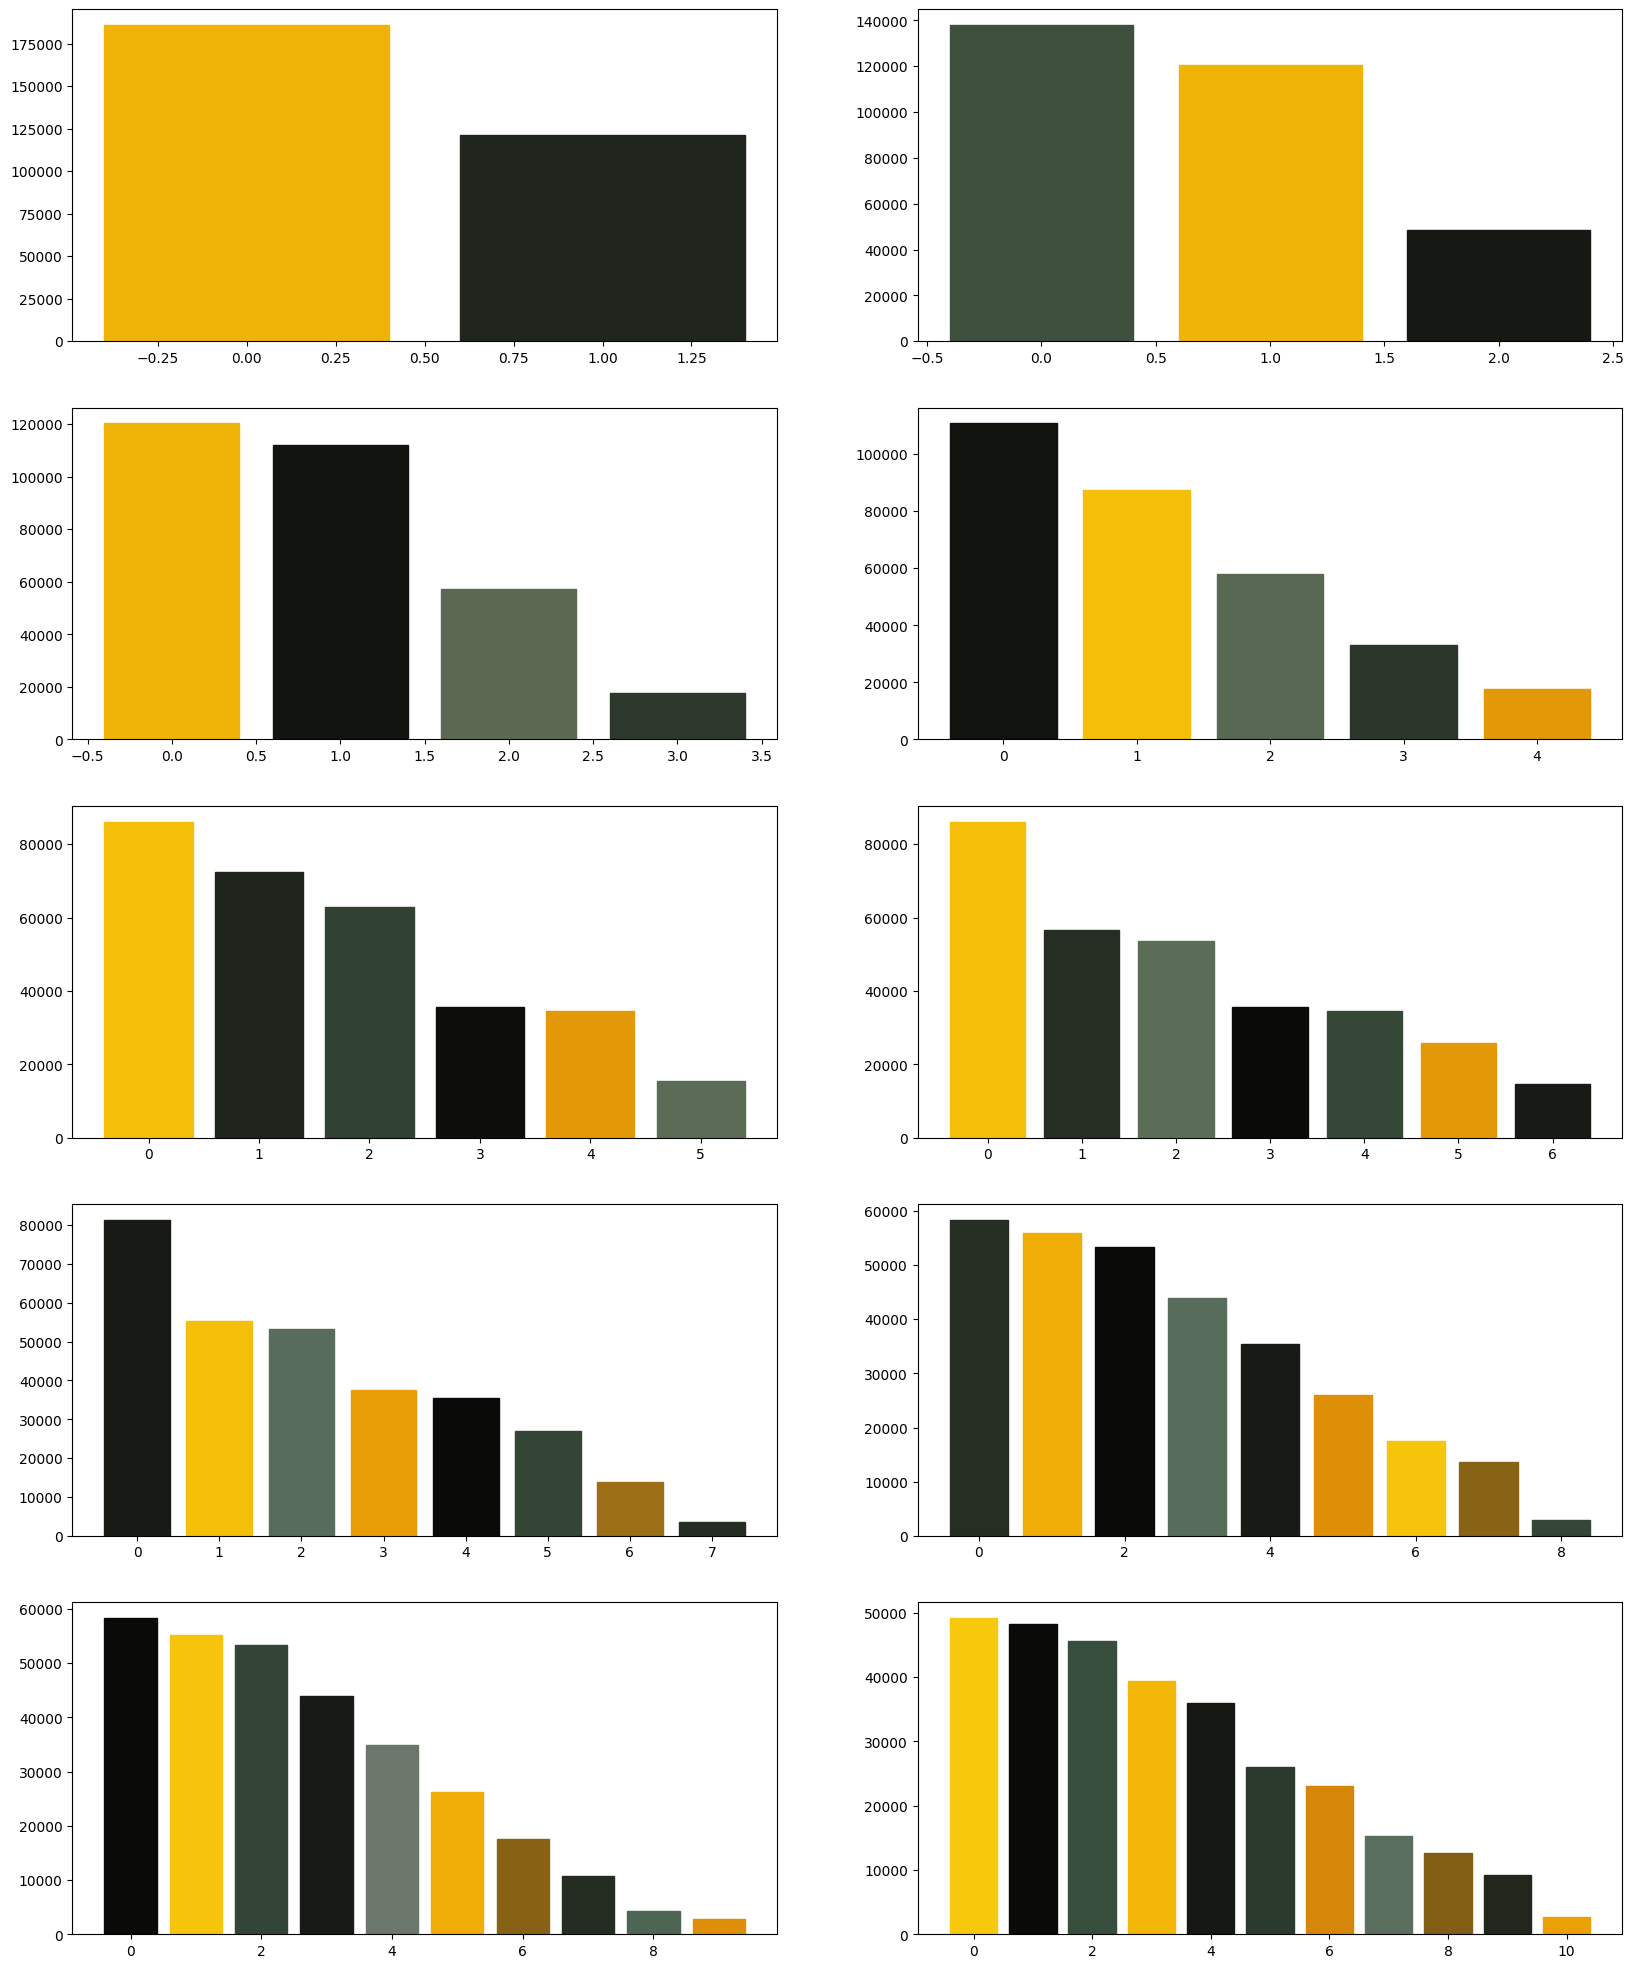

In [72]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x

    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    histogram = (numpy.sort(histogram[0])[::-1], histogram[1])
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

Votre prochain objectif est de tester le code ci-dessus pour les tailles de grappes entre 2 et 21, ce qui vous donnera le chiffre indiqué ci-dessous.

**Note:** L'image suivante a été générée après 6 minutes. 

En option, vous pouvez ajouter des déclarations *print* pour tester si votre code fonctionne bien.

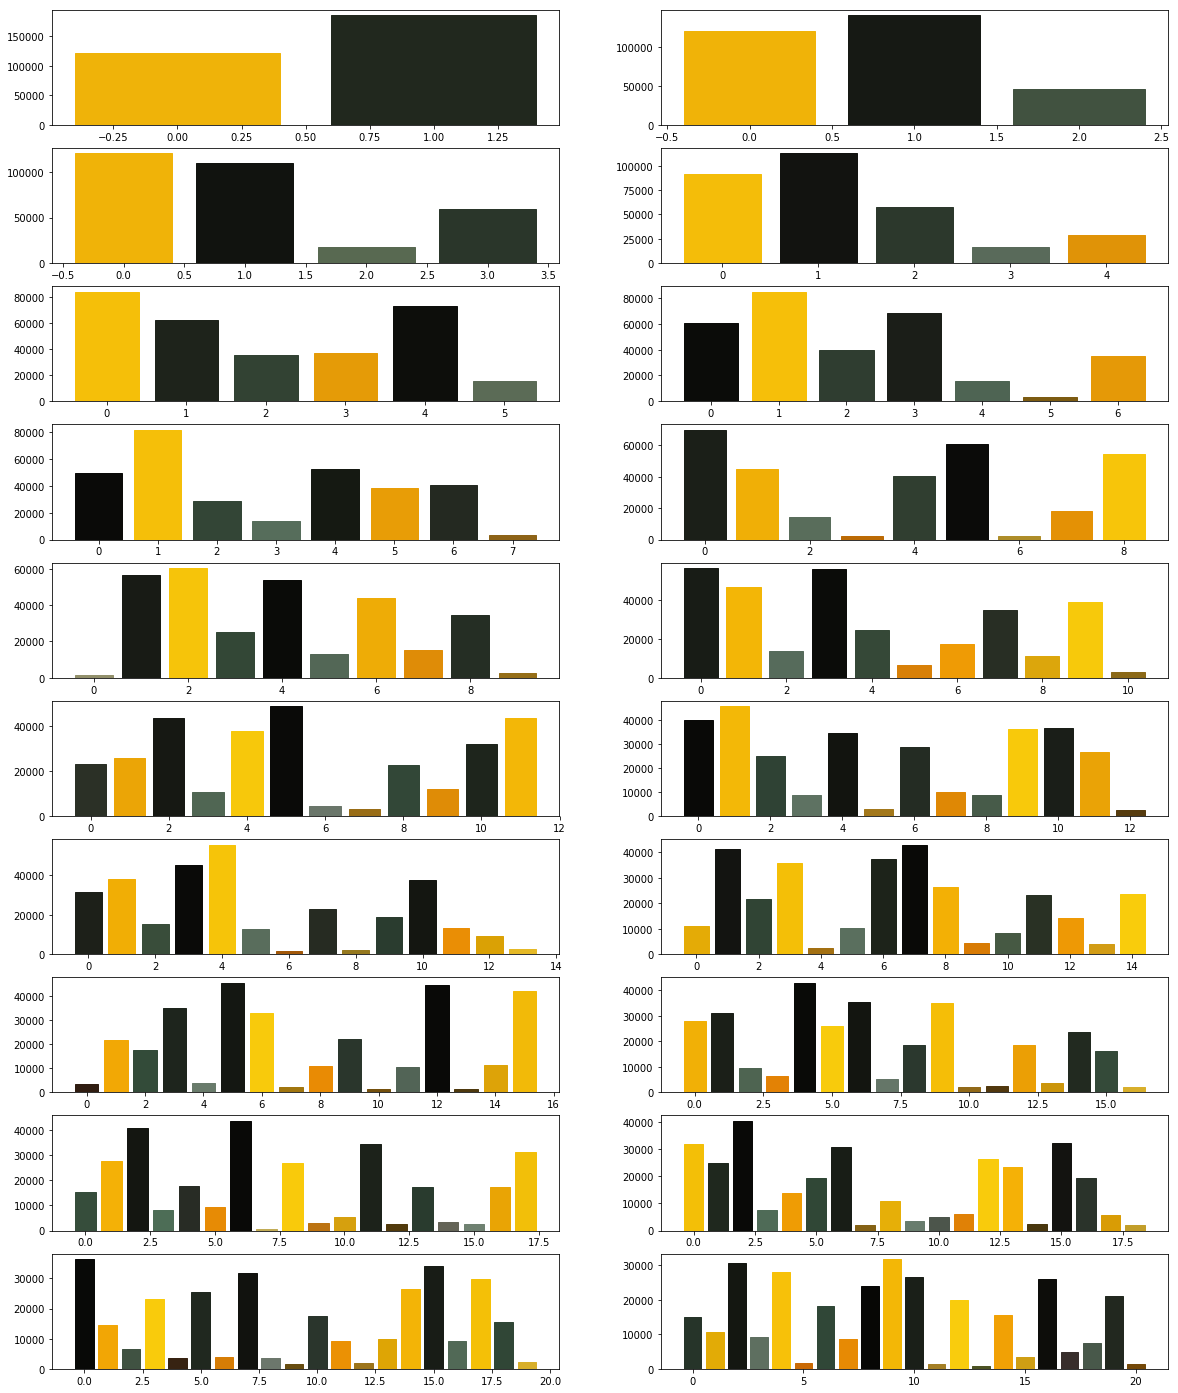

Maintenant, nous modifions l'algorithme ci-dessus pour utiliser l'algorithme de clustering **MiniBatchKMeans**.
(voir [ici](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans)).
Observez les changements.



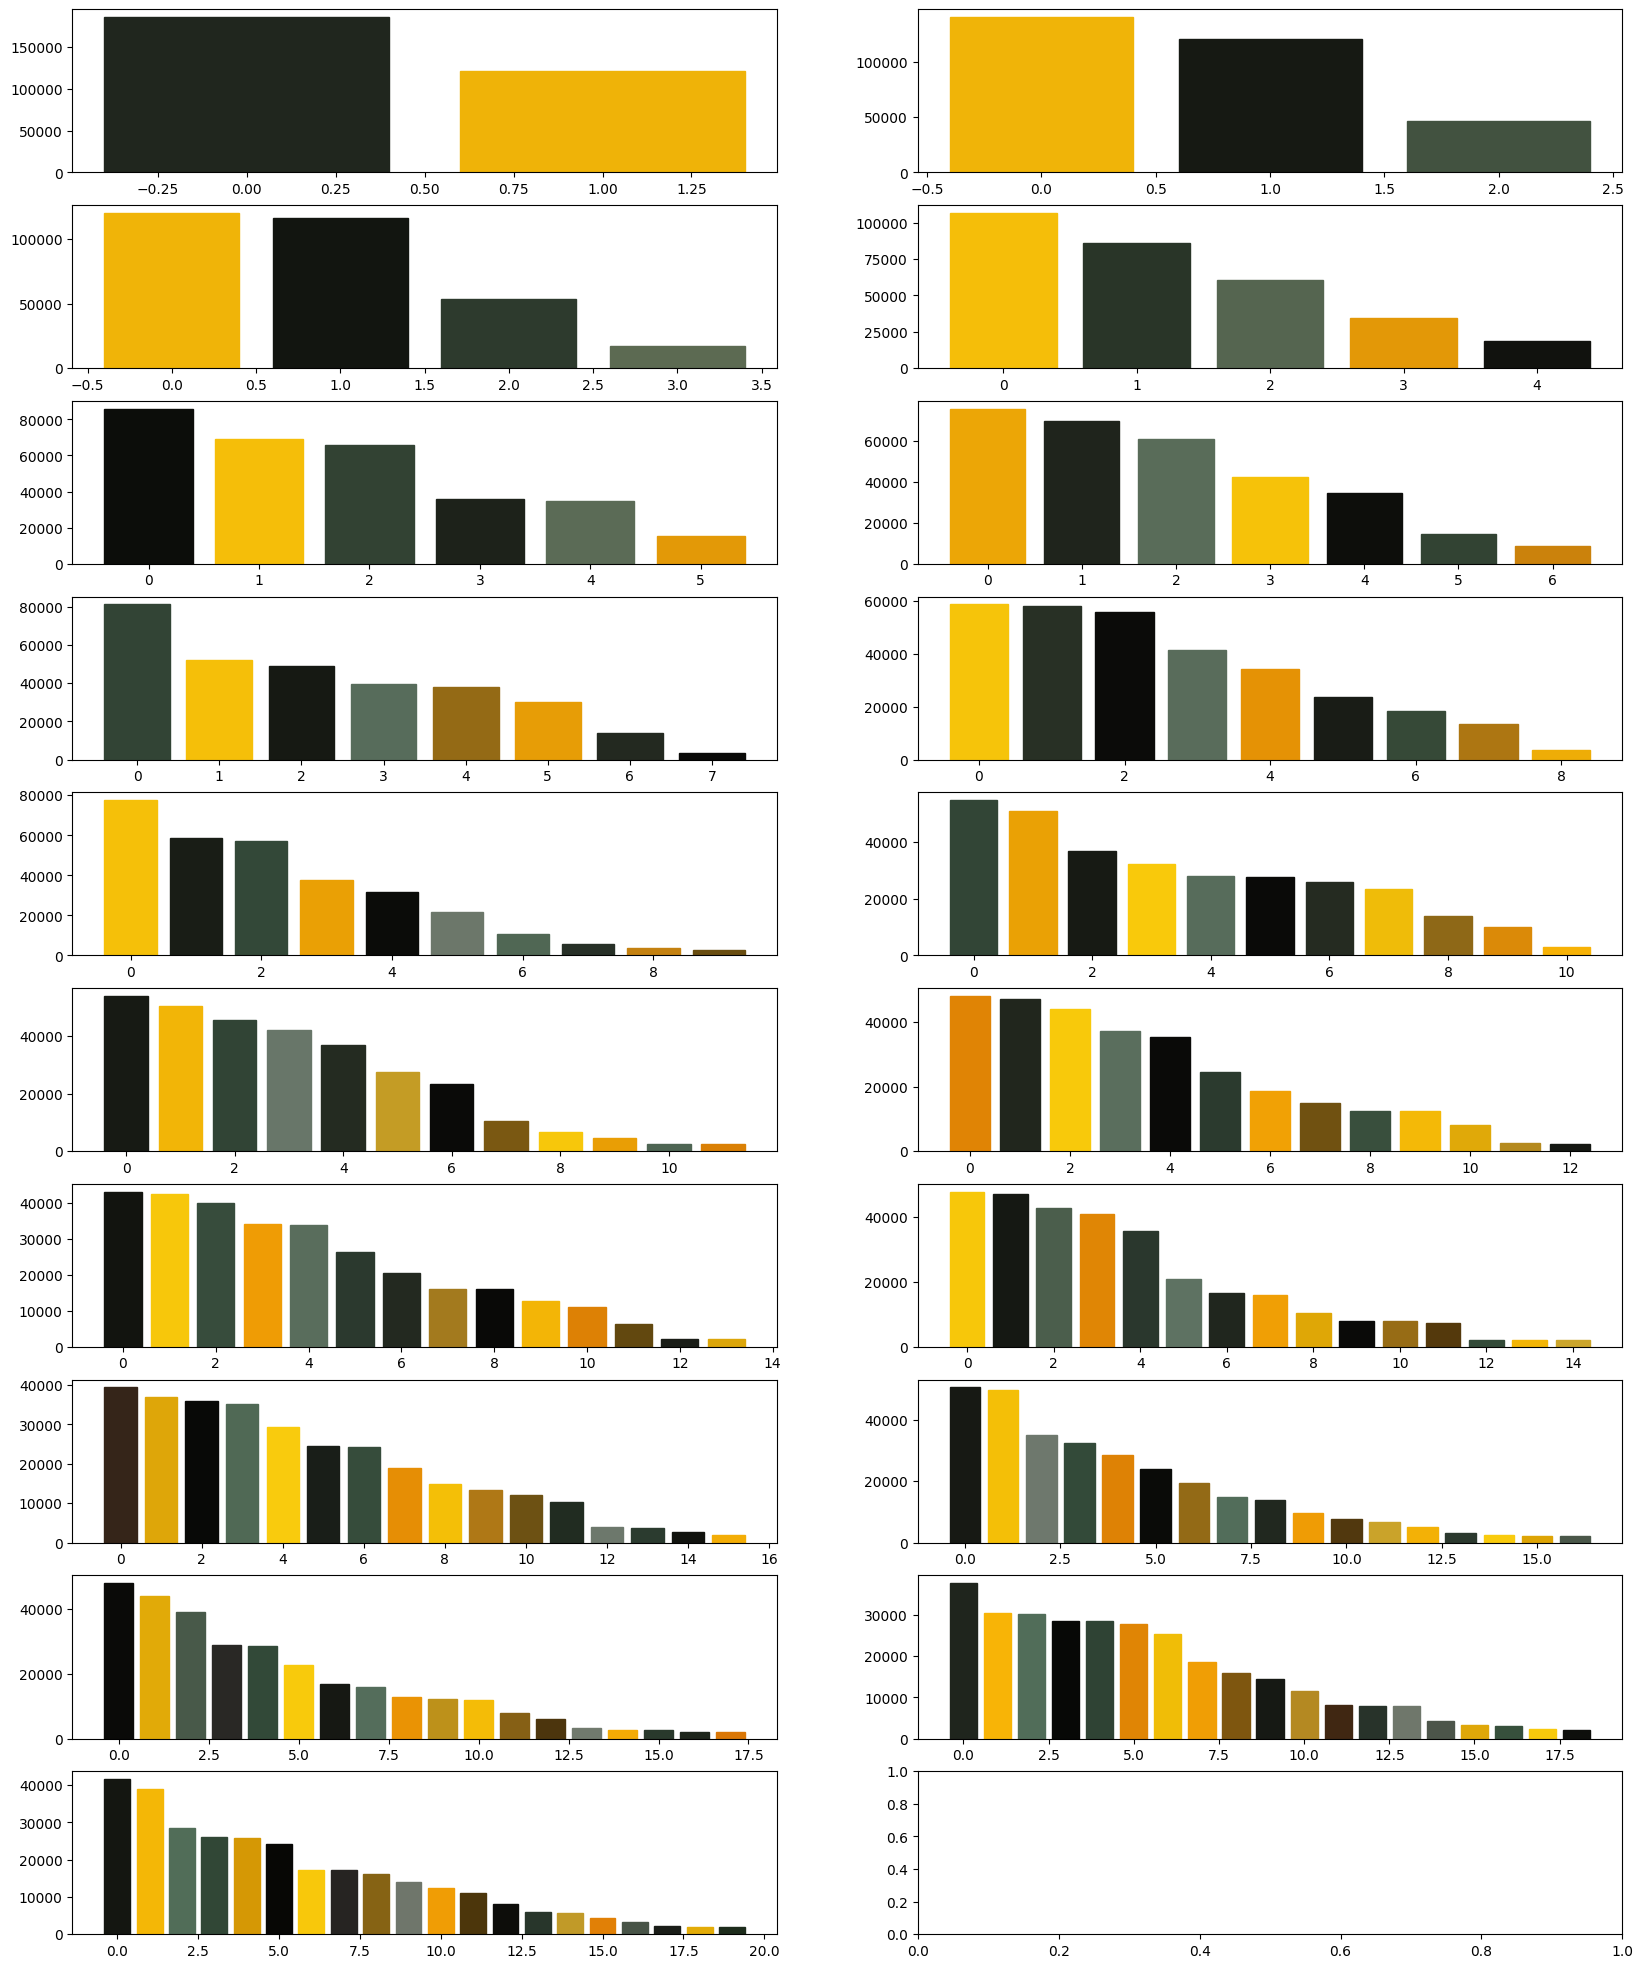

In [76]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=10, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 21):
    cluster_count = x

    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    histogram = (numpy.sort(histogram[0])[::-1], histogram[1])
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

Qu'avez-vous observé ? Votre prochain objectif est de tester le code ci-dessus pour des tailles de grappes comprises entre 2 et 21, ce qui vous donnera la figure ci-dessous.

Quelles sont vos conclusions ?

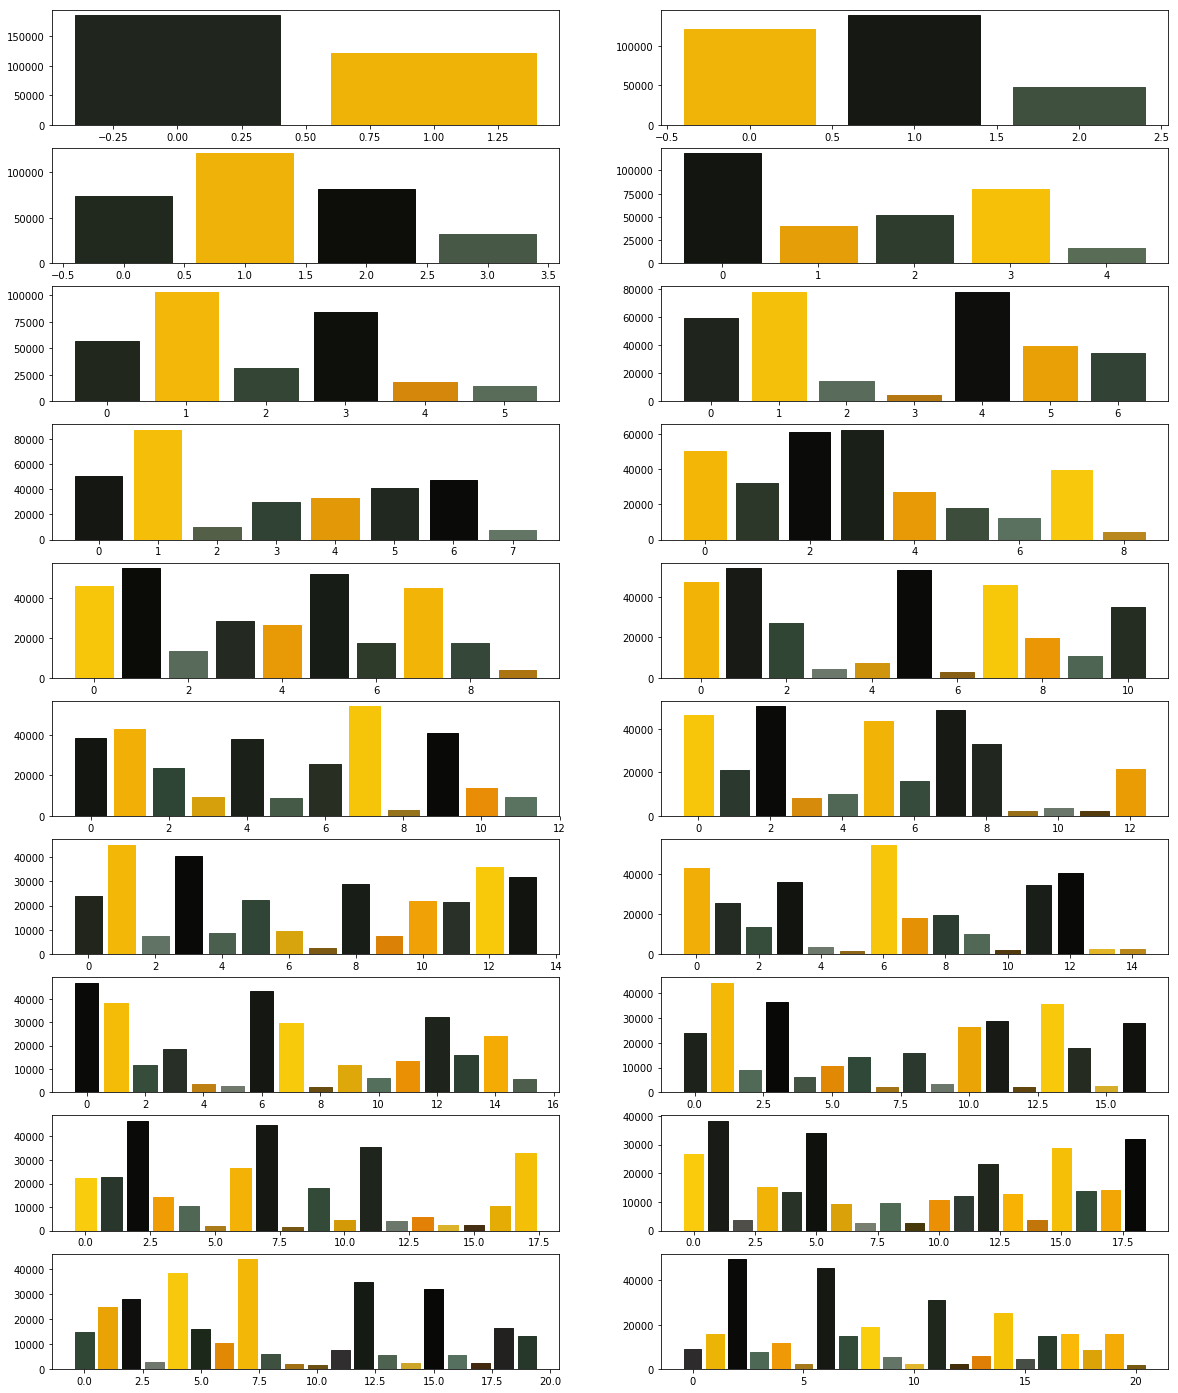

Afin de comparer les deux algorithmes, nous considérons le temps pris par chacun de ces algorithmes. Nous allons répéter l'expérience ci-dessus, mais cette fois nous allons tracer le temps nécessaire pour obtenir des grappes de tailles différentes.

Nous commençons par **KMeans**.


Total time:  1 : 0.0579991340637207
Total time:  2 : 0.07500076293945312
Total time:  3 : 0.11500072479248047
Total time:  4 : 0.1550006866455078
Total time:  5 : 0.2070004940032959
Total time:  6 : 0.22300004959106445
Total time:  7 : 0.2799999713897705
Total time:  8 : 0.4620022773742676
Total time:  9 : 0.4409980773925781
Total time:  10 : 0.5139989852905273
Total time:  11 : 0.5559999942779541
Total time:  12 : 0.5539994239807129
Total time:  13 : 0.5050373077392578
Total time:  14 : 0.6269640922546387
Total time:  15 : 0.764000654220581
Total time:  16 : 0.655998945236206
Total time:  17 : 0.6160016059875488
Total time:  18 : 0.6879994869232178
Total time:  19 : 0.8170008659362793


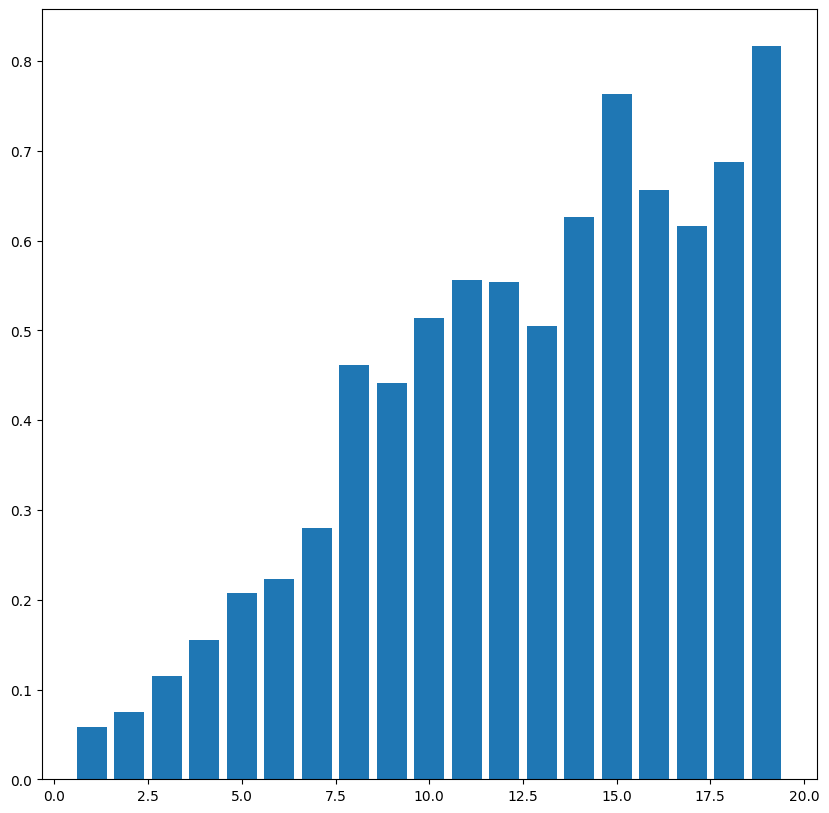

In [77]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

Vous pouvez obtenir un graphique similaire à celui qui suit.

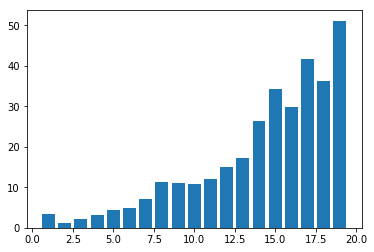

Nous utilisons maintenant **MiniBatchKMeans**.

Total time:  1 : 0.03496575355529785
Total time:  2 : 0.03600001335144043
Total time:  3 : 0.03499937057495117
Total time:  4 : 0.21400141716003418
Total time:  5 : 0.04199957847595215
Total time:  6 : 0.5499987602233887
Total time:  7 : 0.055001020431518555
Total time:  8 : 0.05799984931945801
Total time:  9 : 0.37000155448913574
Total time:  10 : 0.3579990863800049
Total time:  11 : 0.05299878120422363
Total time:  12 : 0.5820043087005615
Total time:  13 : 0.1779956817626953
Total time:  14 : 0.09599924087524414
Total time:  15 : 0.07200121879577637
Total time:  16 : 0.1829991340637207
Total time:  17 : 0.675999641418457
Total time:  18 : 0.4610011577606201
Total time:  19 : 0.48199963569641113
Total time:  20 : 0.21999907493591309
Total time:  21 : 0.051000356674194336
Total time:  22 : 0.4780001640319824
Total time:  23 : 0.3560013771057129
Total time:  24 : 0.4459996223449707
Total time:  25 : 0.40600132942199707
Total time:  26 : 0.48399972915649414
Total time:  27 : 0.4660010337

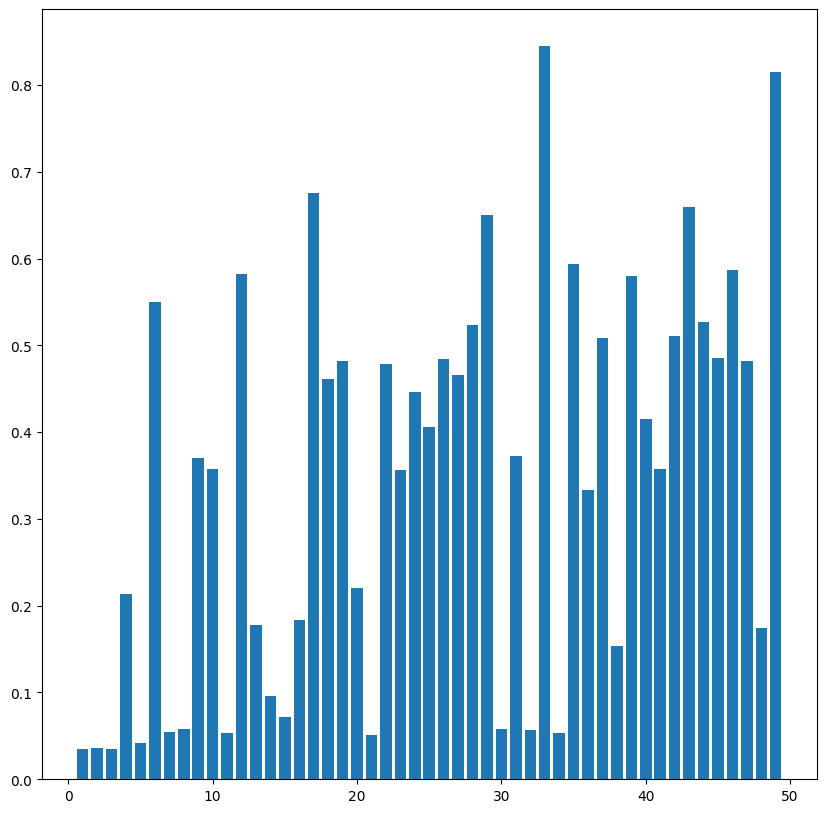

In [79]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 50):
    cluster_count = x

    start_time = time.time()
    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

Vous pouvez obtenir un graphique similaire à celui qui suit.

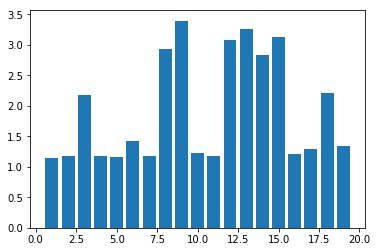

Testez maintenant le code ci-dessus en utilisant l'algorithme **MiniBatchKMeans** avec des tailles de grappes entre 2 et 50. Quelles sont vos observations ?

Enfin, nous voulons voir si nous obtenons les mêmes centres de grappes à partir des deux algorithmes. Lancez le programme suivant pour voir les centres de grappes produits par les deux algorithmes. Nous utilisons deux couleurs différentes (rouge et noir) pour distinguer les centres de grappes des deux algorithmes.


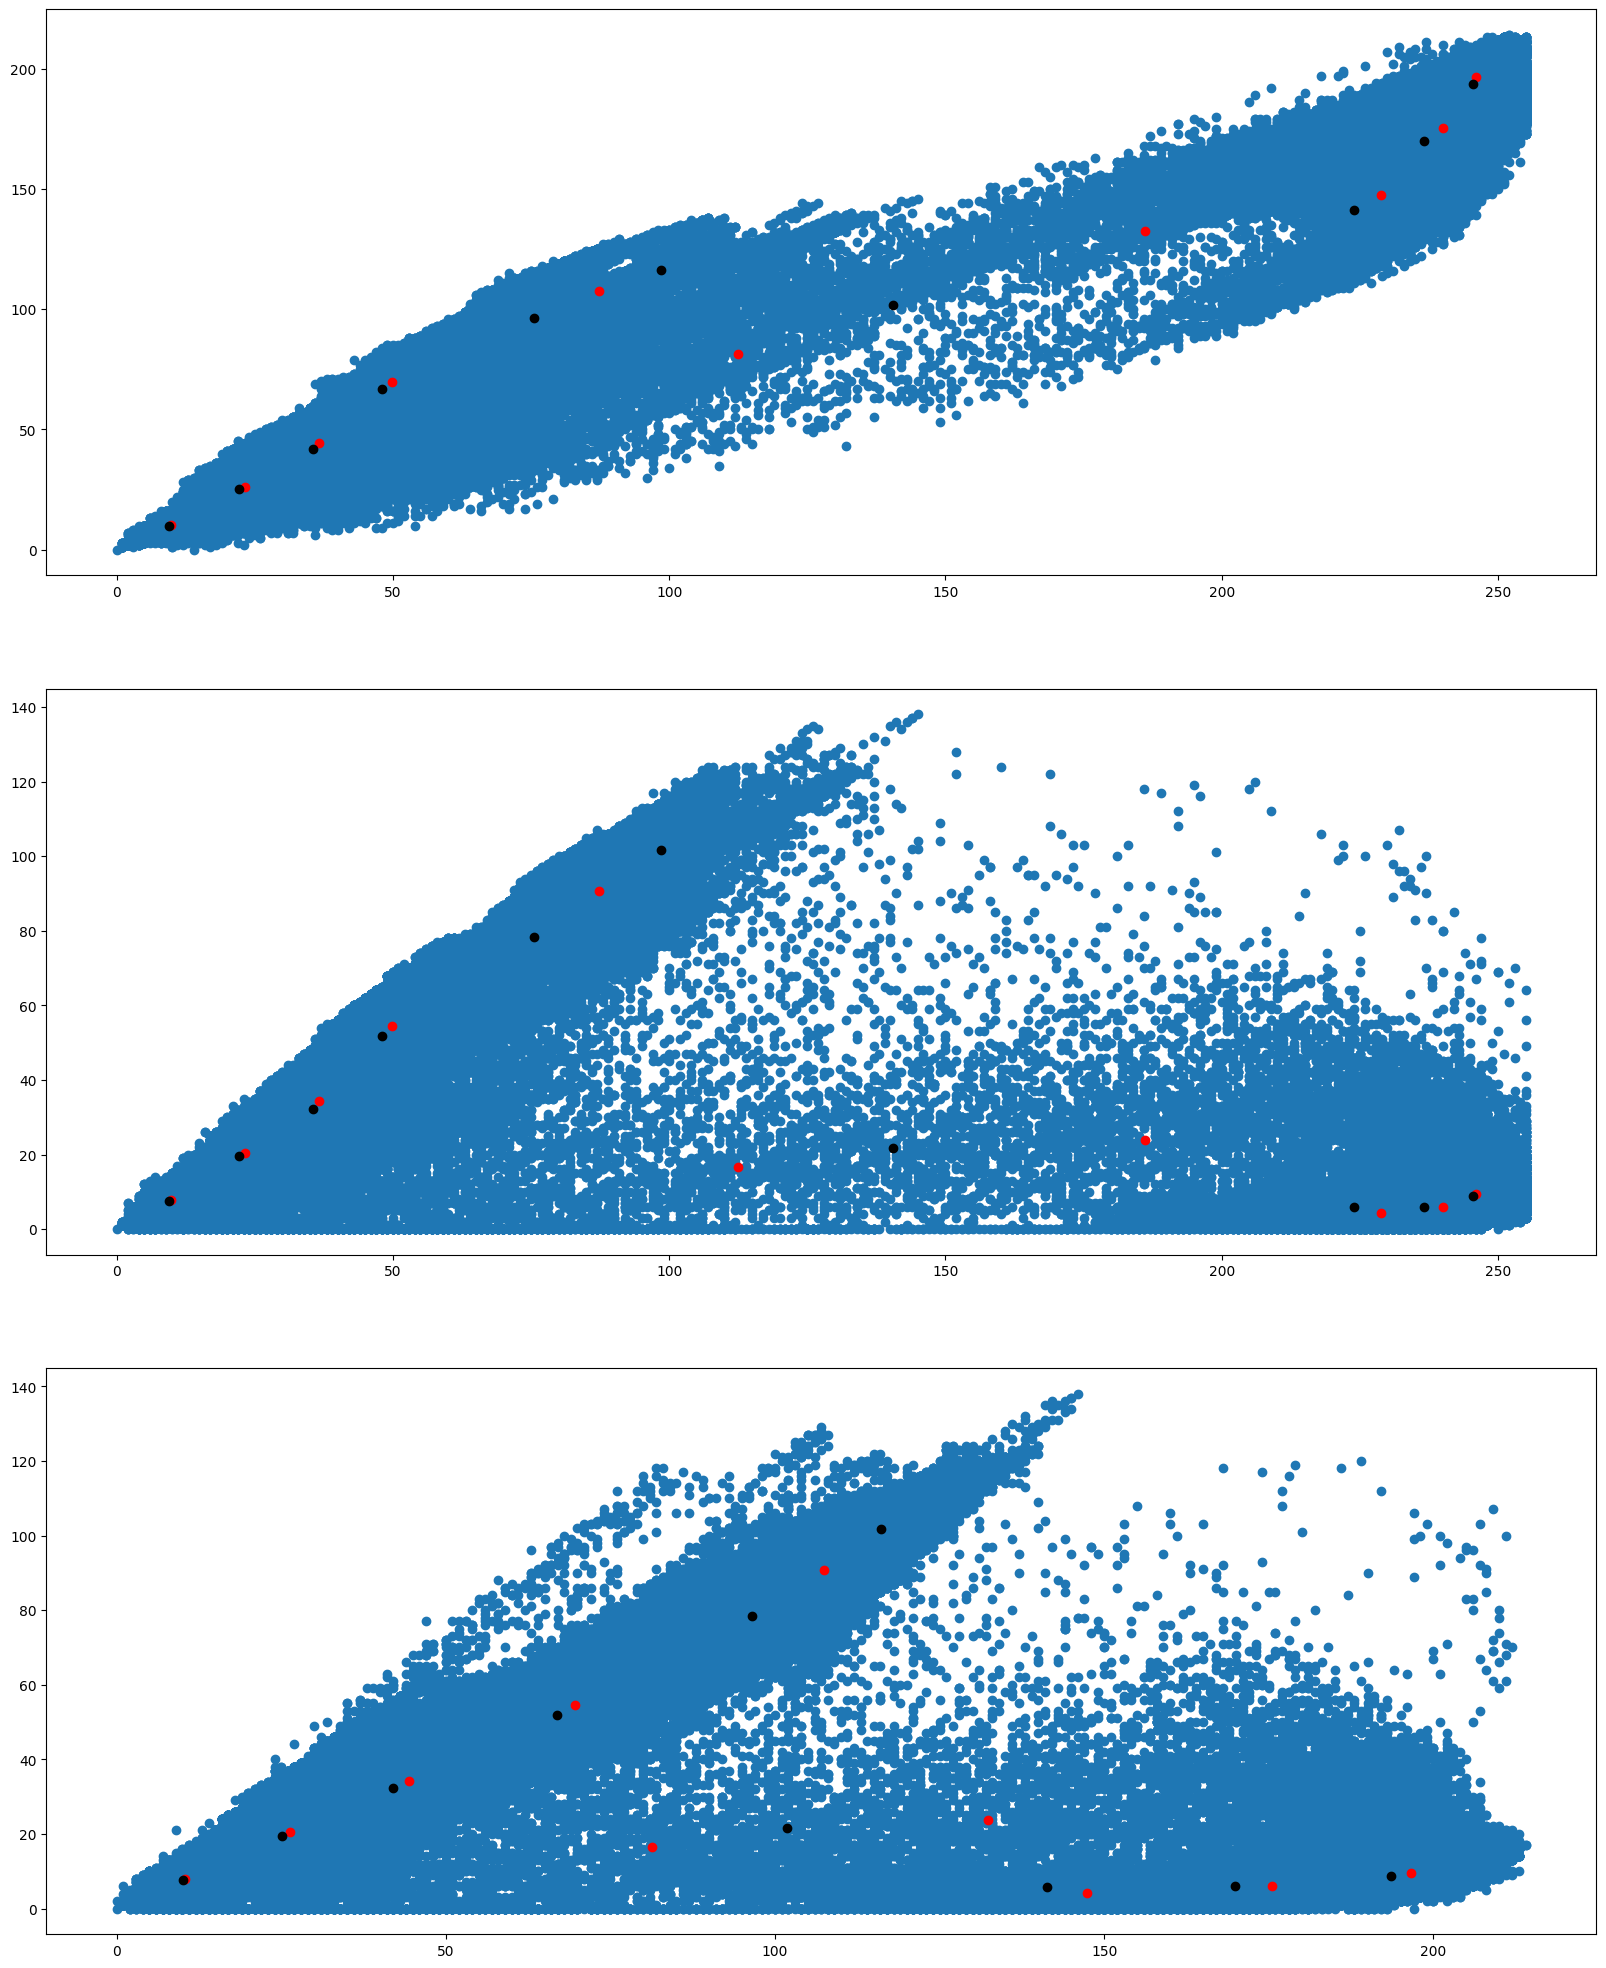

In [80]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

fig, axes = plot.subplots(nrows=3, ncols=1, figsize=(20, 25))
# Scatter plot for RG (RGB)
axes[0].scatter(numarray[:, 0], numarray[:, 1])
axes[0].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], c="red"
)
axes[0].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 1], c="black"
)

# Scatter plot of RB (RGB)
axes[1].scatter(numarray[:, 0], numarray[:, 2])
axes[1].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 2], c="red"
)
axes[1].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 2], c="black"
)

# Scatter plot of GB (RGB)
axes[2].scatter(numarray[:, 1], numarray[:, 2])
axes[2].scatter(
    clusters.cluster_centers_[:, 1], clusters.cluster_centers_[:, 2], c="red"
)
axes[2].scatter(
    mclusters.cluster_centers_[:, 1], mclusters.cluster_centers_[:, 2], c="black"
)

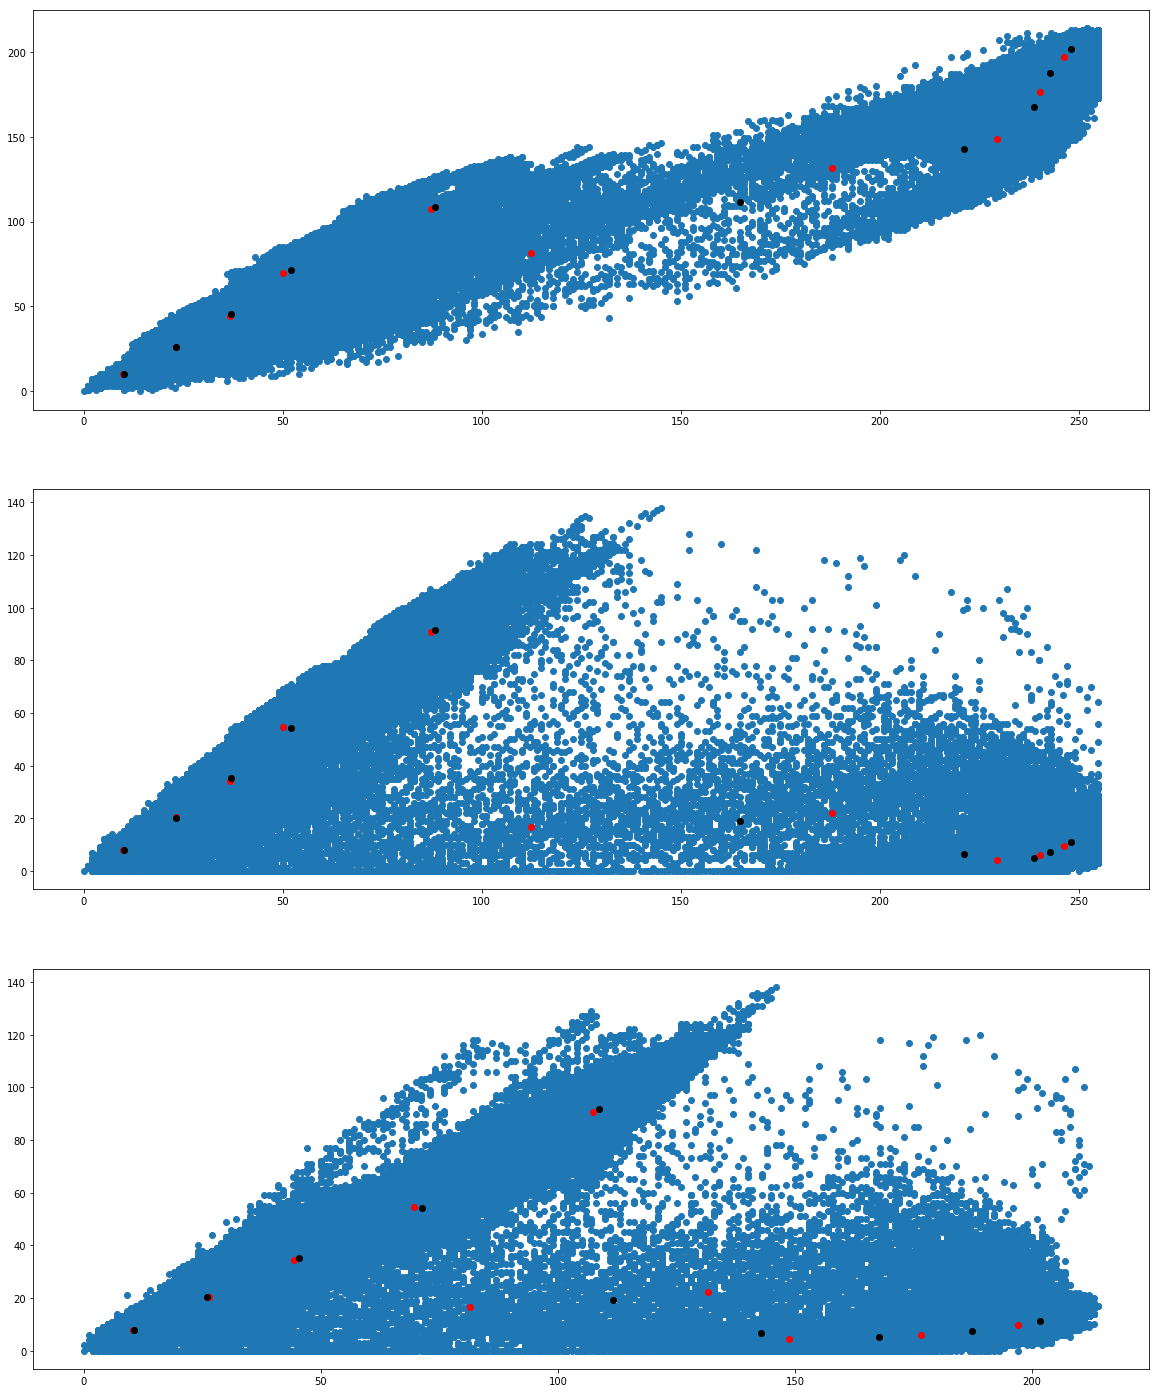

Nous aimerions voir comment les valeurs des pixels individuels ont été regroupées. Exécutez le programme suivant quelques fois.


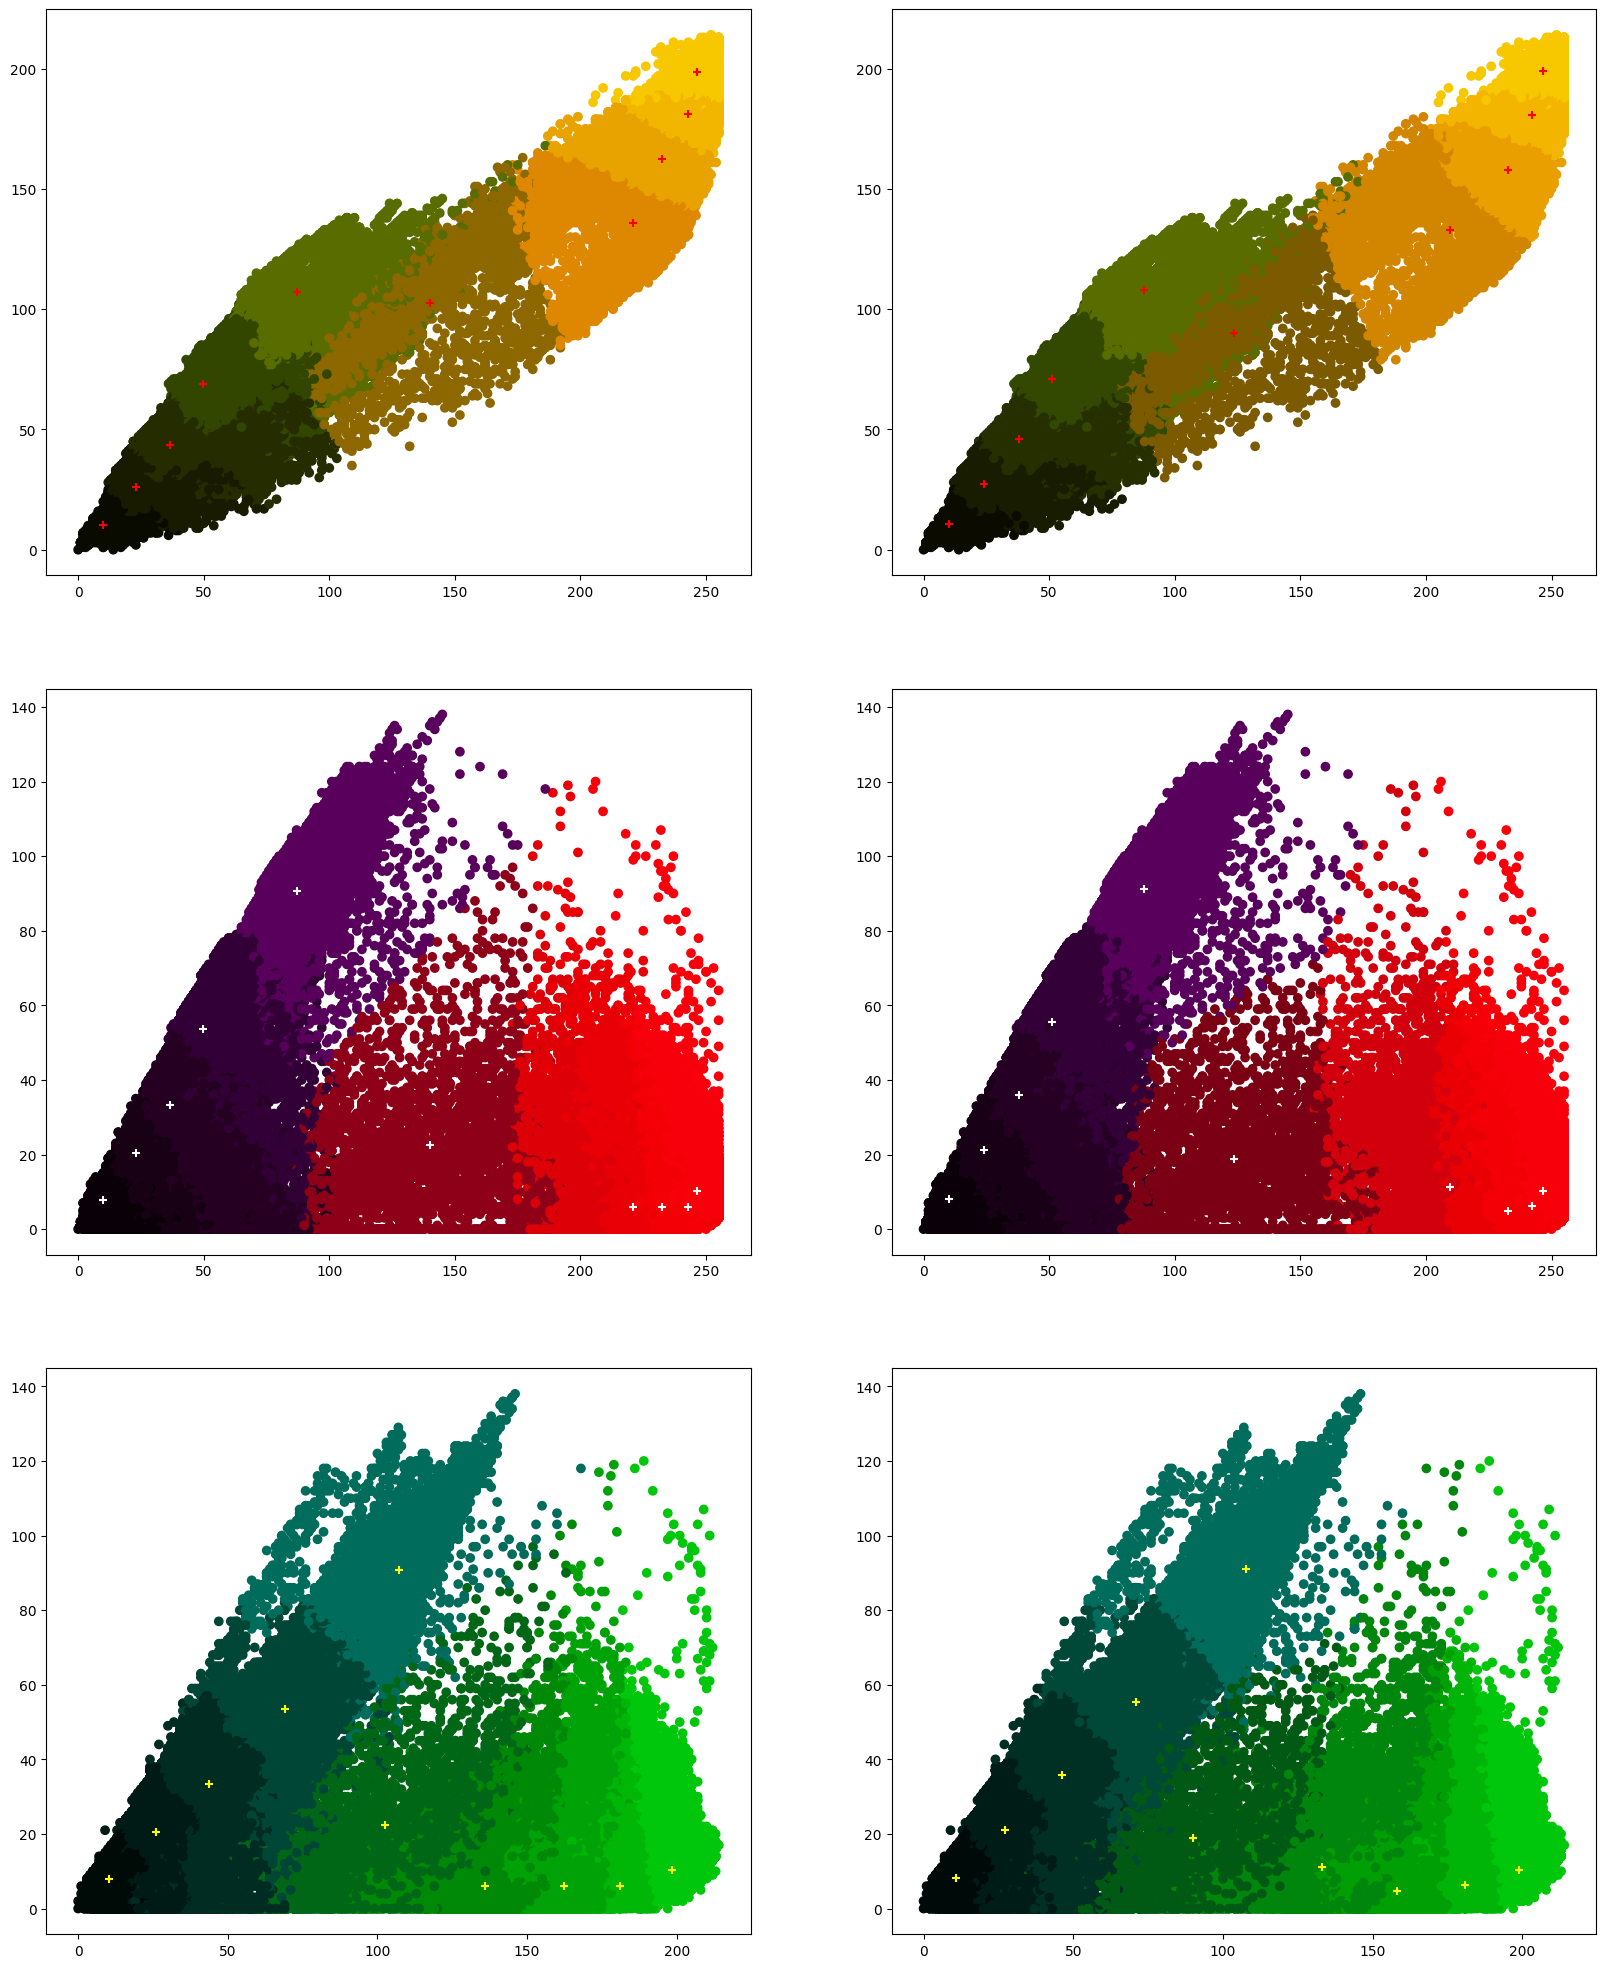

In [81]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
labels = numpy.unique(mclusters.labels_)

fig, axes = plot.subplots(nrows=3, ncols=2, figsize=(20, 25))

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            math.ceil(mclusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 0].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            0,
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[1, 0].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(mclusters.cluster_centers_[j][1]),
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[2, 0].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 0].scatter(
    mclusters.cluster_centers_[:, 1],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            math.ceil(clusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 1].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            0,
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[1, 1].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(clusters.cluster_centers_[j][1]),
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[2, 1].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 1].scatter(
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)
plot.show()

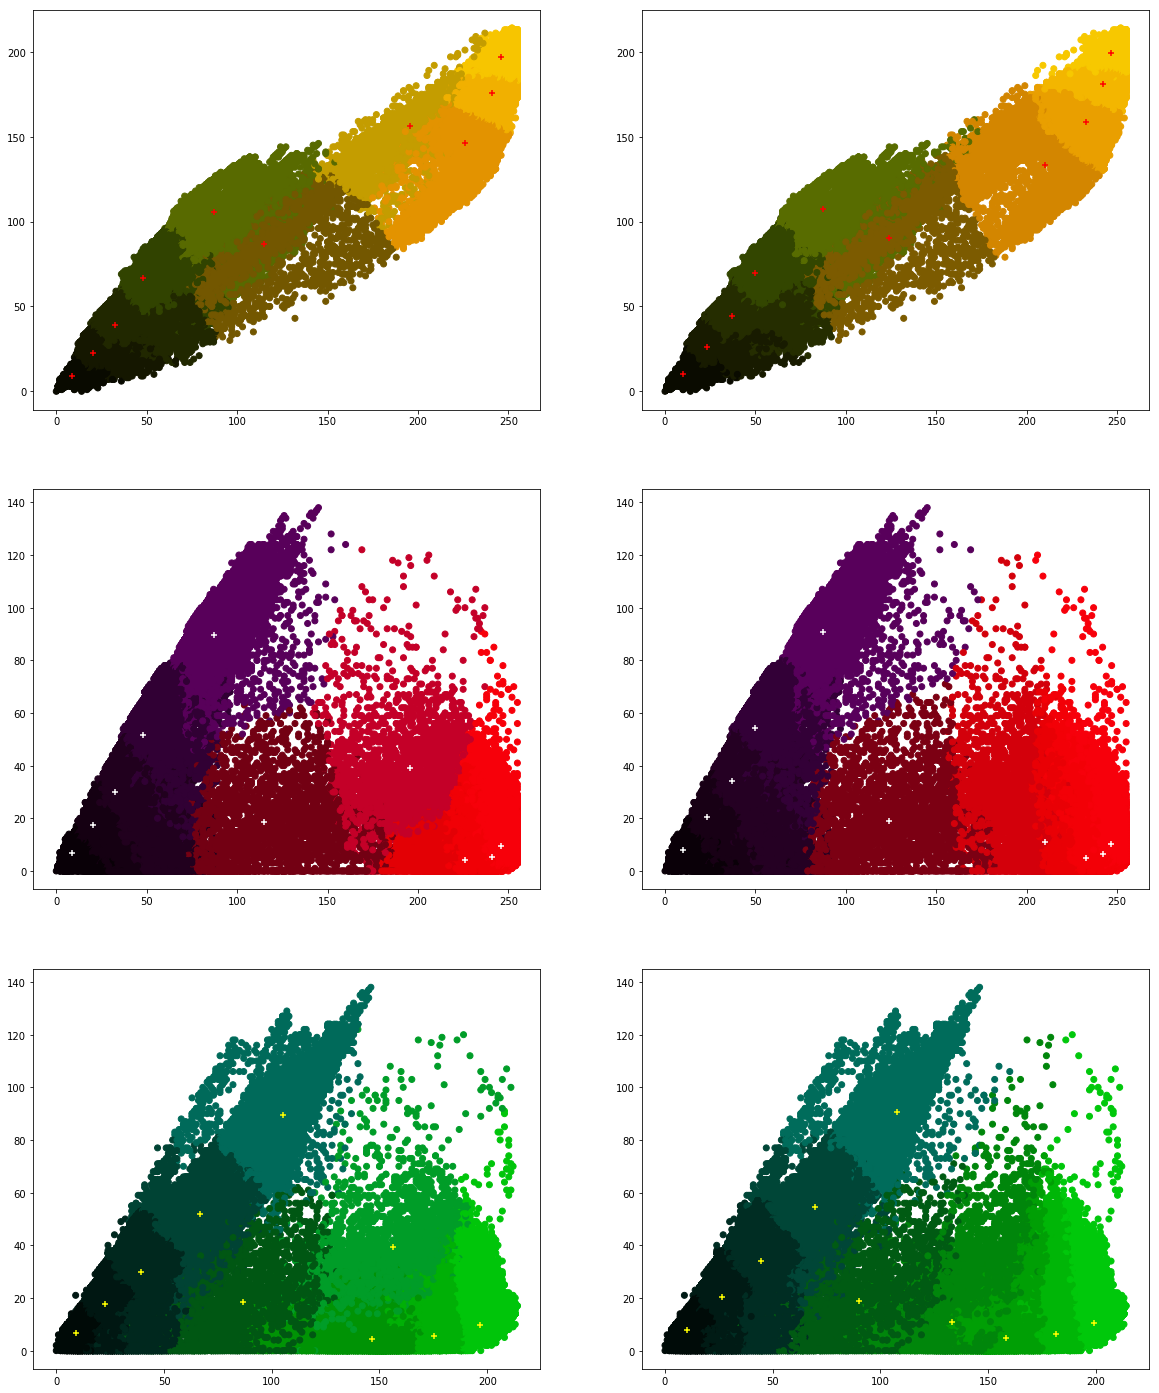

Quelles sont vos conclusions ?



## Exercice 5

Enfin, nous traçons ces clusters en 3D. Testez le graphique suivant avec différentes images et différents nombres de clusters.

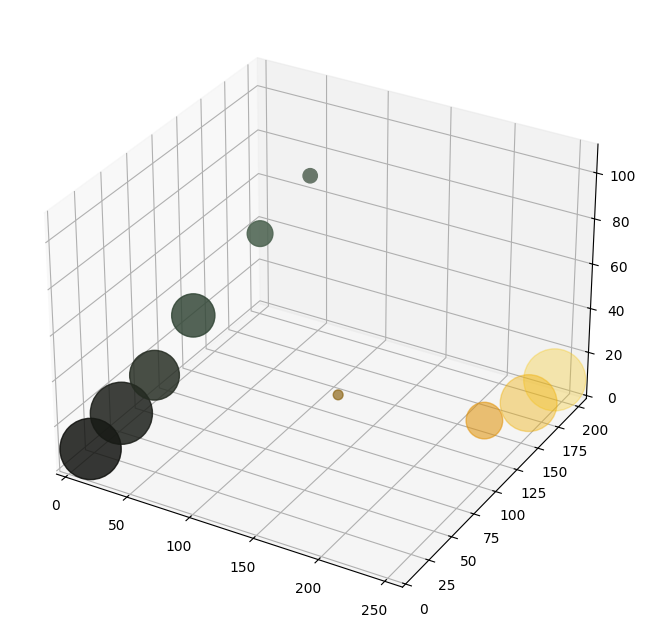

In [85]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import scale, minmax_scale

cluster_count = 10

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

# Calculer les clusters
clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)


# Calculer le nombre de pixels appartenant à chaque cluster
unique, frequency = numpy.unique(clusters.labels_, return_counts=True)

# Mise à l'échelle de la valeur de la fréquence entre 50 et 2000
# (ces valeurs ont été choisies au hasard)
scaled_frequency = minmax_scale(frequency, feature_range=(50, 2000))

colors = []
for i in range(len(clusters.cluster_centers_)):
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )

# Diagramme de dispersion 3D
plot.figure(figsize=(8, 8))
axes = plot.axes(projection="3d")
axes.scatter3D(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    c=colors,
    s=scaled_frequency,
);

Comparez les deux approches (MiniBatchKMeans et KMeans).

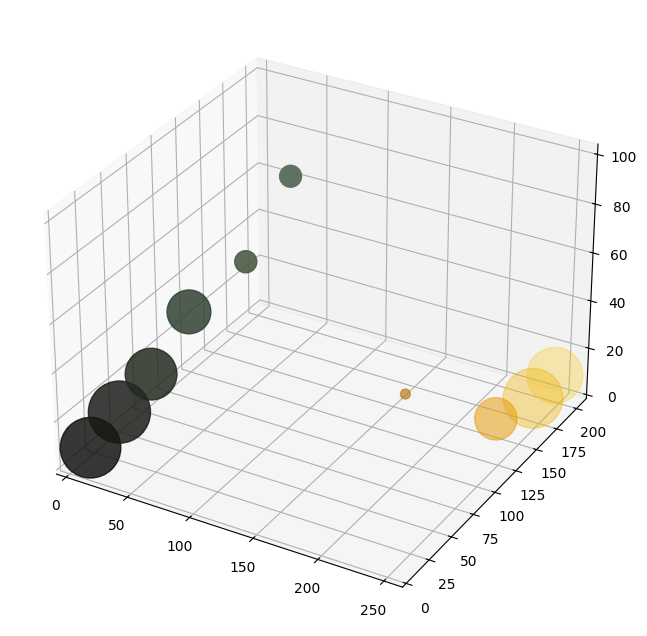

In [84]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import scale, minmax_scale

cluster_count = 10

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

# Calculer les clusters
clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)


# Calculer le nombre de pixels appartenant à chaque cluster
unique, frequency = numpy.unique(clusters.labels_, return_counts=True)

# Mise à l'échelle de la valeur de la fréquence entre 50 et 2000
# (ces valeurs ont été choisies au hasard)
scaled_frequency = minmax_scale(frequency, feature_range=(50, 2000))

colors = []
for i in range(len(clusters.cluster_centers_)):
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )

# Diagramme de dispersion 3D
plot.figure(figsize=(8, 8))
axes = plot.axes(projection="3d")
axes.scatter3D(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    c=colors,
    s=scaled_frequency,
)